In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset = "/content/drive/MyDrive/Progetto Data Science/Dataset Board Games/boardgames.csv"

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clustering libraries
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer

# Classification Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Classification Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Classification Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# **Preprocessing dei dati**

In [ ]:
# importing the dataset
data = pd.read_csv(dataset, delimiter=";")
data.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamedesigner,boardgameartist,boardgamepublisher,boardgamecategory,boardgamemechanic,description
0,174430,Gloomhaven,01/01/2017,1,1,4,60,120,12,3.0,...,12,4,19,7,Isaac Childres,Alexandr Elichev,Cephalofair Games,Adventure,Campaign / Battle Card Driven,Gloomhaven is a game of Euro-inspired tactica...
1,161936,Pandemic Legacy Season,01/01/2015,2,2,4,60,60,13,4.0,...,8,0,33,3,Rob Daviau,Chris Quilliams,Z-Man Games,Environmental,Action Points,Pandemic Legacy is a co-operative campaign gam...
2,167791,Terraforming Mars,01/01/2016,3,1,5,120,120,12,3.0,...,9,15,29,6,Jacob Fryxelius,Isaac Fryxelius,FryxGames,Economic,Card Drafting,"In the 2400s, mankind begins to terraform the ..."
3,182028,Through the Ages A New Story of Civilization,01/01/2015,4,2,4,120,120,14,3.0,...,5,1,14,2,Vlaada Chvuetil,Filip Murmak,Czech Games Edition,Card Game,Action Points,Through the Ages: A New Story of Civilization ...
4,224517,Brass Birmingham,01/01/2018,5,2,4,60,120,14,3.0,...,8,0,9,6,Gavan Brown,Lina Cossette,Roxley,Economic,Hand Management,Brass: Birmingham is an economic strategy game...


In [ ]:
#delete unused columns for clustering and classification
drop_items = ["name", "yearpublished", "sortindex", "boardgamedesigner", "boardgameartist", "boardgamepublisher", "boardgamemechanic", "description"]

data = data.drop(drop_items, axis=1)
data.head()

,objectid,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,...,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamecategory
0,174430,1,4,60,120,12,3.0,4.0,827,14.0,...,1,3,9,23,5,12,4,19,7,Adventure
1,161936,2,4,60,60,13,4.0,4.0,549,12.0,...,2,1,11,20,2,8,0,33,3,Environmental
2,167791,1,5,120,120,12,3.0,4.0,1252,12.0,...,1,1,20,20,6,9,15,29,6,Economic
3,182028,2,4,120,120,14,3.0,4.0,436,14.0,...,1,4,13,3,3,5,1,14,2,Card Game
4,224517,2,4,60,120,14,3.0,4.0,242,14.0,...,3,3,8,6,3,8,0,9,6,Economic


In [ ]:
data.isnull().sum()

objectid                     0
minplayers                   0
maxplayers                   0
minplaytime                  0
maxplaytime                  0
minage                       0
min_community             5764
max_community             5100
totalvotes                   0
playerage                 7211
languagedependence           0
usersrated                   0
average_rate                 0
numgeeklists                 0
numtrading                   0
numwanting                   0
numcomments                  0
siteviews                    0
numplays                     0
numplays_month               0
news                         0
blogs                        0
weblink                      0
podcast                      0
boardgamedesigner_cnt        0
boardgameartist_cnt          0
boardgamepublisher_cnt       0
boardgamehonor_cnt           0
boardgamecategory_cnt        0
boardgamemechanic_cnt        0
boardgameexpansion_cnt       0
boardgameversion_cnt         0
boardgam

In [ ]:
# Dealing with null values, for numerical:
for col in data.columns:
    if data[col].dtype != object:
        data[col]=data[col].fillna(data[col].mean())

# check semantic values of data
for i in range(0,len(data)):
  while data["min_community"][i] > data["max_community"][i]:
    data["min_community"][i] = data["min_community"][i] - 1
  while data["max_community"][i] < data["min_community"][i]:
    data["max_community"][i] = data["max_community"][i] + 1


data = data.set_index("objectid")
data = data.dropna()
data.head(100)

,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,languagedependence,...,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamecategory
objectid,,,,,,,,,,,,,,,,,,,,,
174430,1,4,60,120,12,3.0,4.000000,827,14.0,4,...,1,3,9,23,5,12,4,19,7,Adventure
161936,2,4,60,60,13,4.0,4.000000,549,12.0,4,...,2,1,11,20,2,8,0,33,3,Environmental
167791,1,5,120,120,12,3.0,4.000000,1252,12.0,3,...,1,1,20,20,6,9,15,29,6,Economic
182028,2,4,120,120,14,3.0,4.000000,436,14.0,4,...,1,4,13,3,3,5,1,14,2,Card Game
224517,2,4,60,120,14,3.0,4.000000,242,14.0,1,...,3,3,8,6,3,8,0,9,6,Economic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104162,2,5,120,120,14,5.0,5.000000,383,12.0,4,...,4,10,10,1,5,10,43,16,7,Adventure
161970,2,4,120,120,13,4.0,4.000000,285,12.0,3,...,1,1,13,9,2,7,3,15,1,Deduction
203993,2,4,60,120,12,4.0,4.000000,114,12.0,1,...,3,3,11,2,1,4,5,13,4,Renaissance


In [ ]:
data.isnull().sum()

minplayers                0
maxplayers                0
minplaytime               0
maxplaytime               0
minage                    0
min_community             0
max_community             0
totalvotes                0
playerage                 0
languagedependence        0
usersrated                0
average_rate              0
numgeeklists              0
numtrading                0
numwanting                0
numcomments               0
siteviews                 0
numplays                  0
numplays_month            0
news                      0
blogs                     0
weblink                   0
podcast                   0
boardgamedesigner_cnt     0
boardgameartist_cnt       0
boardgamepublisher_cnt    0
boardgamehonor_cnt        0
boardgamecategory_cnt     0
boardgamemechanic_cnt     0
boardgameexpansion_cnt    0
boardgameversion_cnt      0
boardgamefamily_cnt       0
boardgamecategory         0
dtype: int64


# **Data Visualization**

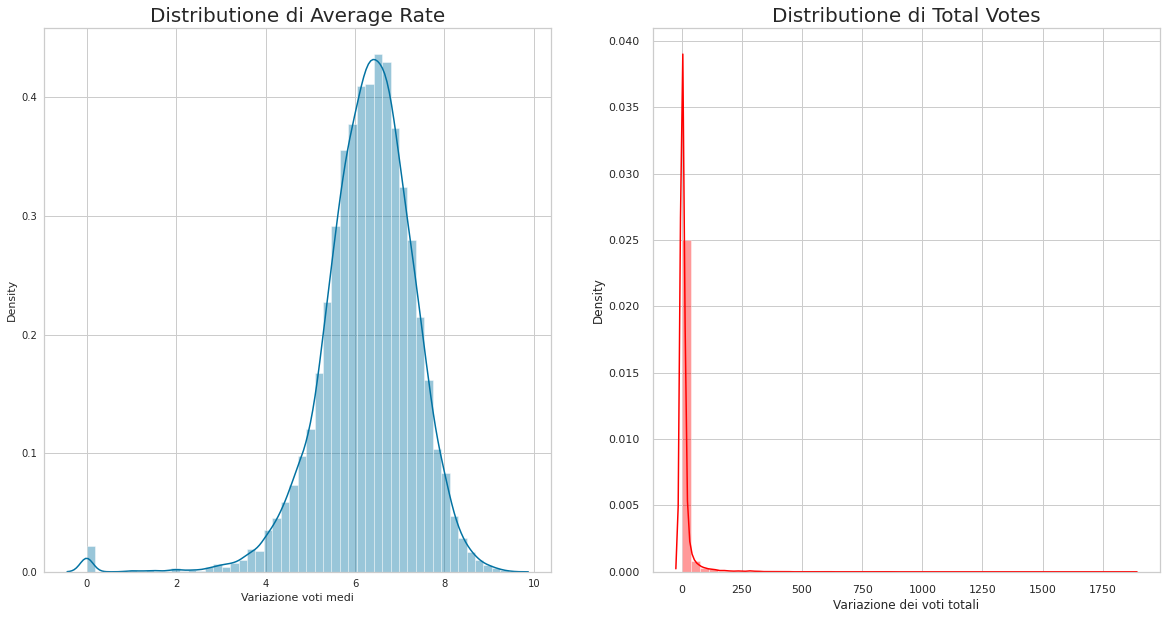

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['average_rate'], kde=True)
plt.title('Distributione di Average Rate', fontsize = 20)
plt.xlabel('Variazione voti medi')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['totalvotes'], color = 'red', kde=True)
plt.title('Distributione di Total Votes', fontsize = 20)
plt.xlabel('Variazione dei voti totali')
plt.show()

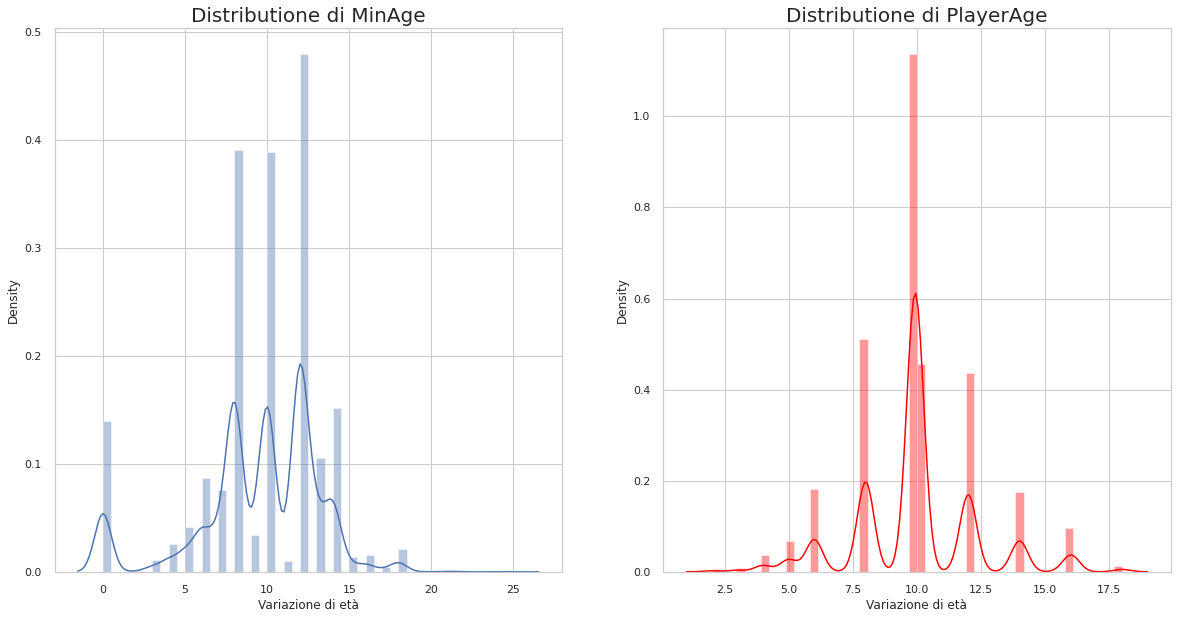

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['minage'], kde=True)
plt.title('Distributione di MinAge', fontsize = 20)
plt.xlabel('Variazione di età')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['playerage'], color = 'red', kde=True)
plt.title('Distributione di PlayerAge', fontsize = 20)
plt.xlabel('Variazione di età')
plt.show()

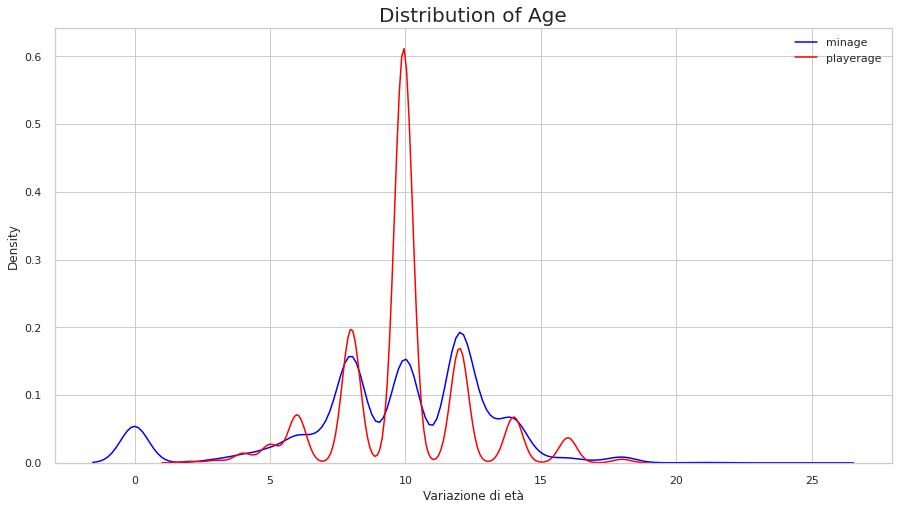

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['minage'], kde=True, color='blue', hist=False)
sns.distplot(data['playerage'],  kde=True, color='red', hist=False)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Variazione di età')
plt.legend(['minage','playerage'])
plt.show()

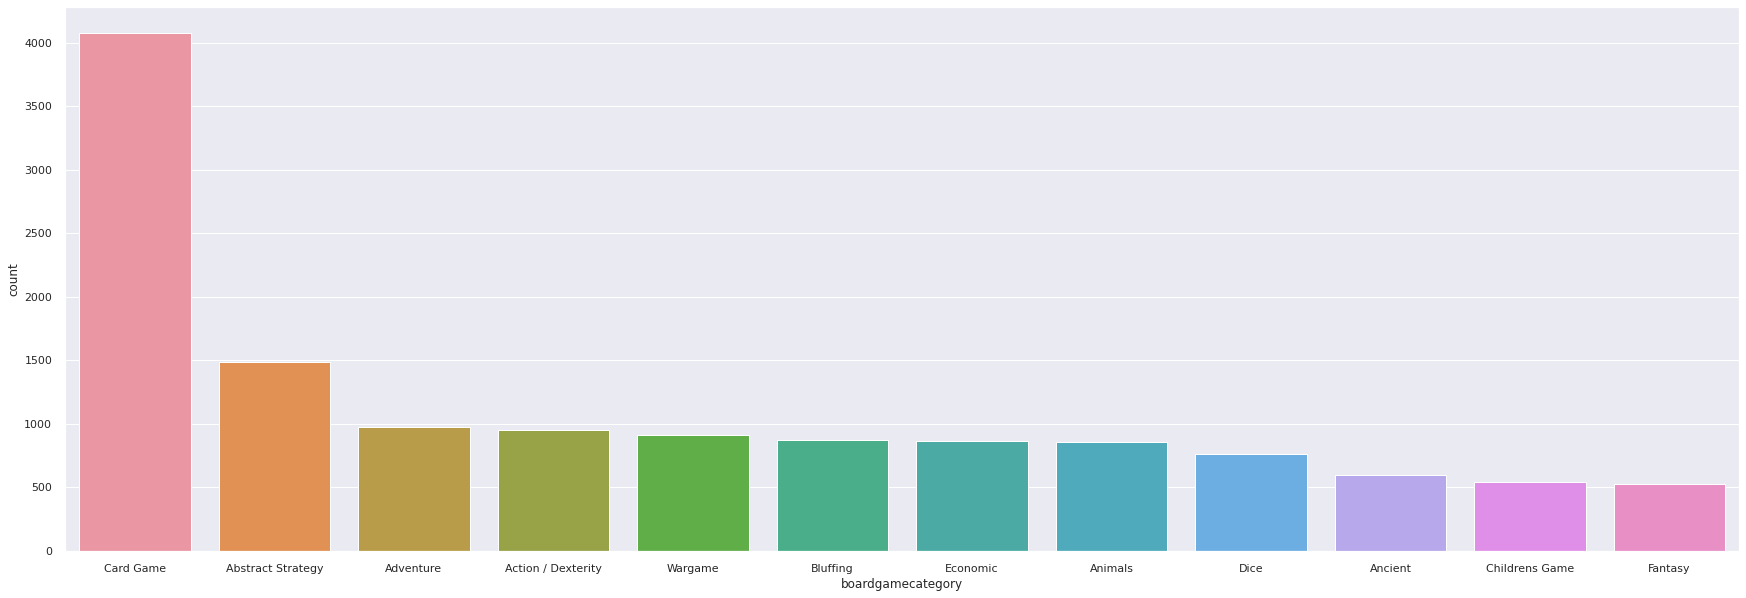

In [ ]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="boardgamecategory",data=data, order=pd.value_counts(data['boardgamecategory']).iloc[:12].index)

In [ ]:
i = 0
for col in data.columns:
  print("'"+col+"'"+str(i))
  i = i+1

'minplayers'0
'maxplayers'1
'minplaytime'2
'maxplaytime'3
'minage'4
'min_community'5
'max_community'6
'totalvotes'7
'playerage'8
'languagedependence'9
'usersrated'10
'average_rate'11
'numgeeklists'12
'numtrading'13
'numwanting'14
'numcomments'15
'siteviews'16
'numplays'17
'numplays_month'18
'news'19
'blogs'20
'weblink'21
'podcast'22
'boardgamedesigner_cnt'23
'boardgameartist_cnt'24
'boardgamepublisher_cnt'25
'boardgamehonor_cnt'26
'boardgamecategory_cnt'27
'boardgamemechanic_cnt'28
'boardgameexpansion_cnt'29
'boardgameversion_cnt'30
'boardgamefamily_cnt'31
'boardgamecategory'32


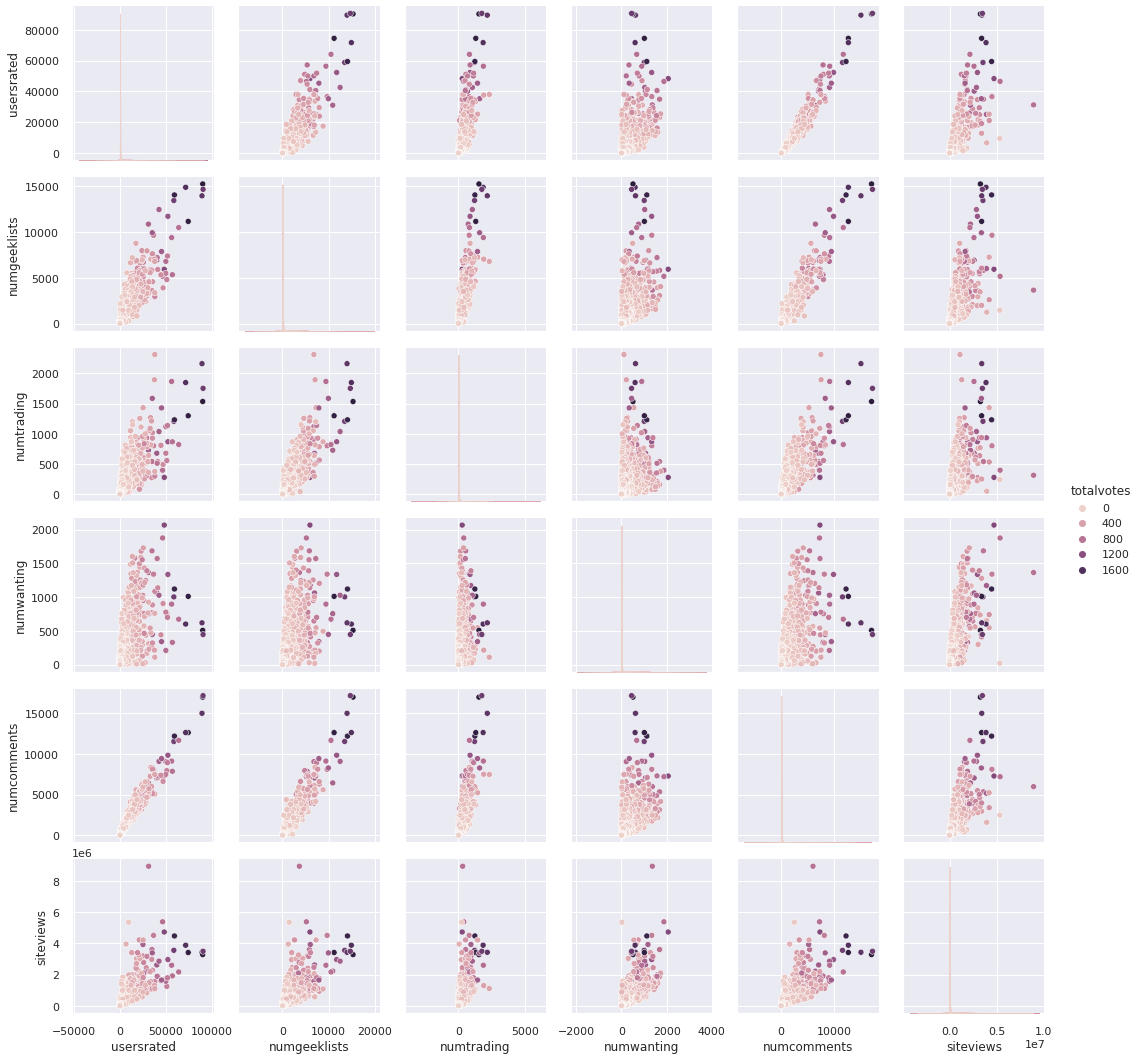

In [ ]:
drop_list_1= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
#'totalvotes',
'playerage',
#'usersrated',
'average_rate',
'languagedependence',
#'numgeeklists',
#'numtrading',
#'numwanting',
#'numcomments',
#'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',
'boardgamedesigner_cnt',
'boardgameartist_cnt',
'boardgamepublisher_cnt',
'boardgamehonor_cnt',
'boardgamecategory_cnt',
'boardgamemechanic_cnt',
'boardgameexpansion_cnt',
'boardgameversion_cnt',
'boardgamefamily_cnt']
sns.pairplot(data.drop(drop_list_1, axis=1, inplace=False), hue="totalvotes")

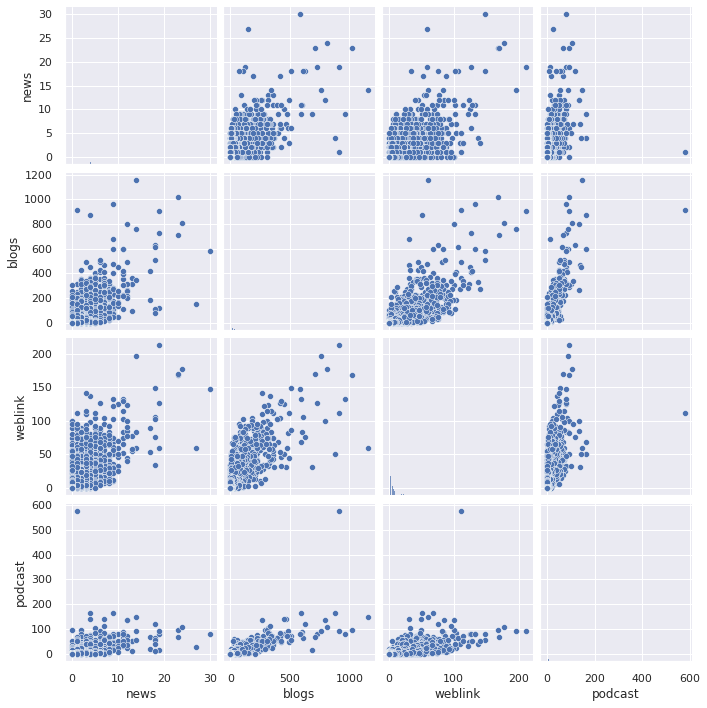

In [ ]:
drop_list_2= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
'totalvotes',
'playerage',
'usersrated',
'average_rate',
'languagedependence',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
#'news',
#'blogs',
#'weblink',
#'podcast',
'boardgamedesigner_cnt',
'boardgameartist_cnt',
'boardgamepublisher_cnt',
'boardgamehonor_cnt',
'boardgamecategory_cnt',
'boardgamemechanic_cnt',
'boardgameexpansion_cnt',
'boardgameversion_cnt',
'boardgamefamily_cnt',
'boardgamecategory']
sns.pairplot(data.drop(drop_list_2, axis=1, inplace=False))

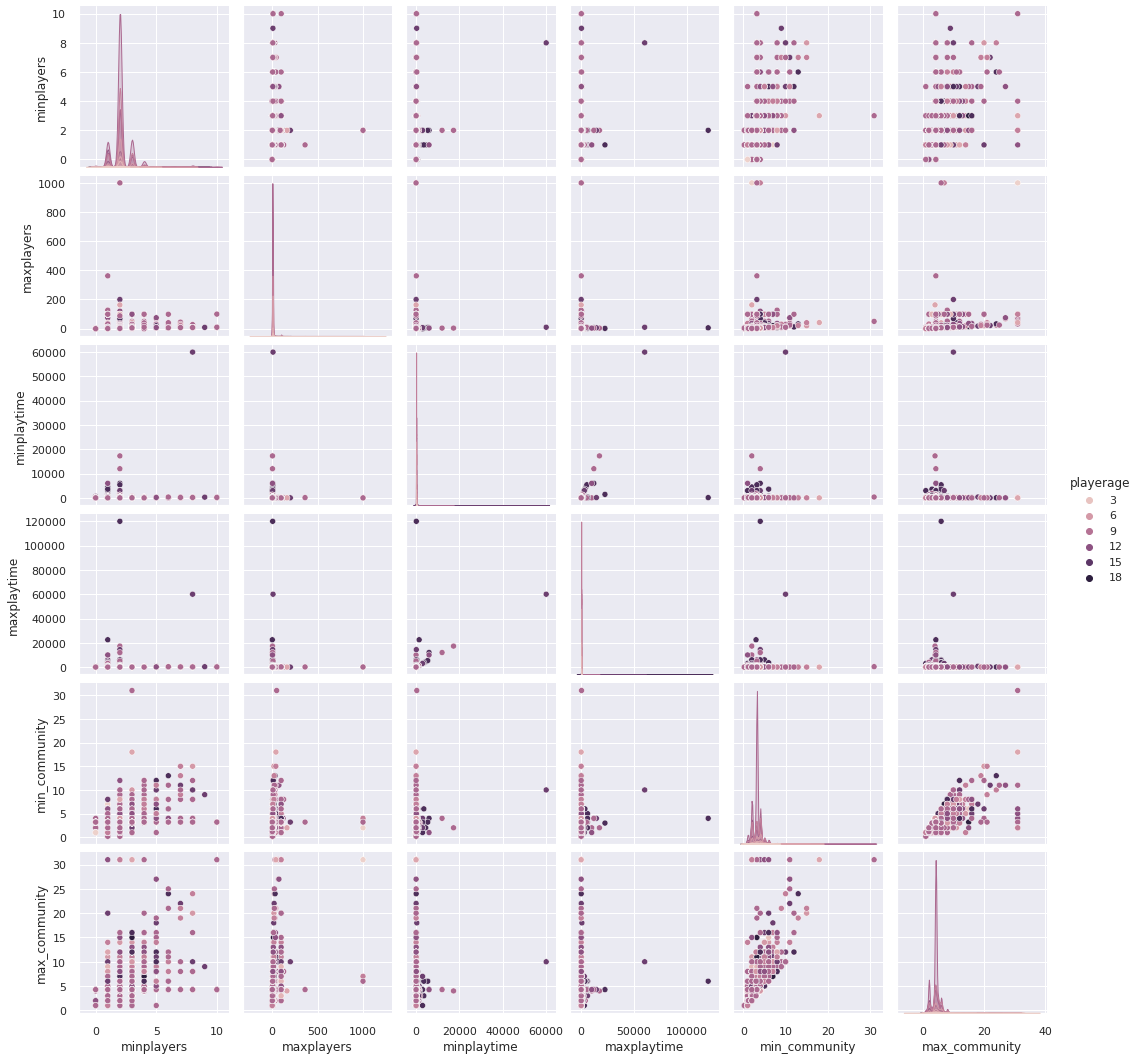

In [ ]:
drop_list_3= [#'minplayers',
#'maxplayers',
#'minplaytime',
#'maxplaytime',
'minage',
#'min_community',
#'max_community',
'totalvotes',
#'playerage',
'usersrated',
'average_rate',
'languagedependence',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',
'boardgamedesigner_cnt',
'boardgameartist_cnt',
'boardgamepublisher_cnt',
'boardgamehonor_cnt',
'boardgamecategory_cnt',
'boardgamemechanic_cnt',
'boardgameexpansion_cnt',
'boardgameversion_cnt',
'boardgamefamily_cnt']
sns.pairplot(data.drop(drop_list_3, axis=1, inplace=False), hue="playerage")

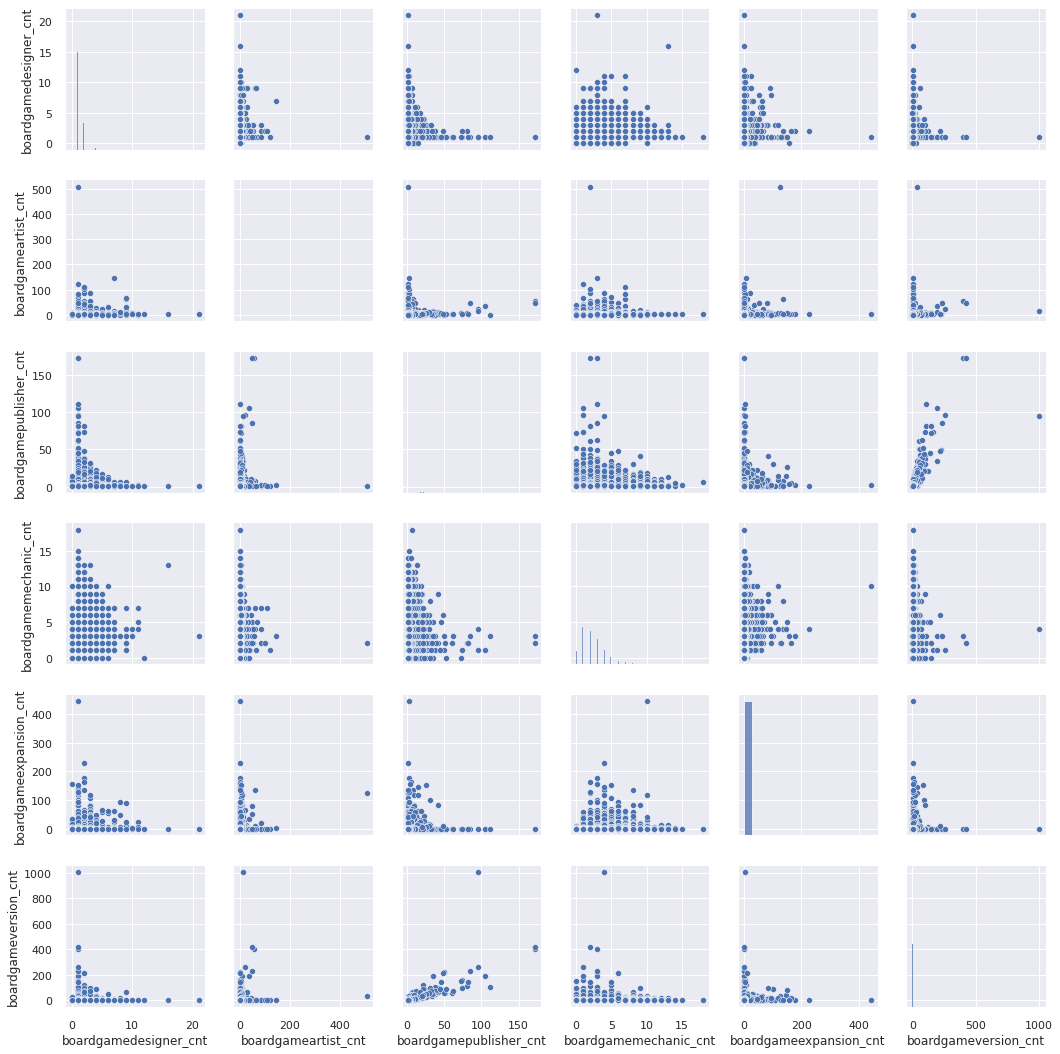

In [ ]:
drop_list_4= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
'totalvotes',
'playerage',
'usersrated',
'average_rate',
'languagedependence',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',
#'boardgamedesigner_cnt',
#'boardgameartist_cnt',
#'boardgamepublisher_cnt',
'boardgamehonor_cnt',
'boardgamecategory_cnt',
#'boardgamemechanic_cnt',
#'boardgameexpansion_cnt',
#'boardgameversion_cnt',
'boardgamefamily_cnt']
sns.pairplot(data.drop(drop_list_4, axis=1, inplace=False))

# **Clustering**

In [ ]:
# Data Normalization
norm_list= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
'totalvotes',
'playerage',
'usersrated',
'average_rate',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',
'boardgamedesigner_cnt', 
'boardgameartist_cnt', 
'boardgamepublisher_cnt', 
'boardgamehonor_cnt', 
'boardgamecategory_cnt', 
'boardgamemechanic_cnt',
'boardgameexpansion_cnt',
 'boardgameversion_cnt', 
 'boardgamefamily_cnt', 
 'languagedependence']
names = data.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(data[norm_list])
data[norm_list] = scaled_d
data.head()

,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,languagedependence,...,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamecategory
objectid,,,,,,,,,,,,,,,,,,,,,
174430,0.1,0.004004,0.001,0.0010,0.48,0.090752,0.1,0.442719,0.750,0.8,...,0.047619,0.005906,0.046784,0.46,0.307692,0.666667,0.009009,0.018962,0.081395,Adventure
161936,0.2,0.004004,0.001,0.0005,0.52,0.123226,0.1,0.293897,0.625,0.8,...,0.095238,0.001969,0.058480,0.40,0.076923,0.444444,0.000000,0.032934,0.034884,Environmental
167791,0.1,0.005005,0.002,0.0010,0.48,0.090752,0.1,0.670236,0.625,0.6,...,0.047619,0.001969,0.111111,0.40,0.384615,0.500000,0.033784,0.028942,0.069767,Economic
182028,0.2,0.004004,0.002,0.0010,0.56,0.090752,0.1,0.233405,0.750,0.8,...,0.047619,0.007874,0.070175,0.06,0.153846,0.277778,0.002252,0.013972,0.023256,Card Game
224517,0.2,0.004004,0.001,0.0010,0.56,0.090752,0.1,0.129550,0.750,0.2,...,0.142857,0.005906,0.040936,0.12,0.153846,0.444444,0.000000,0.008982,0.069767,Economic


## **KMeans Clustering**






In [ ]:
# take only annual income and spending score
x = data.iloc[:, [7, 11]].values

# let's check the shape of x
print(x.shape)


(19495, 2)


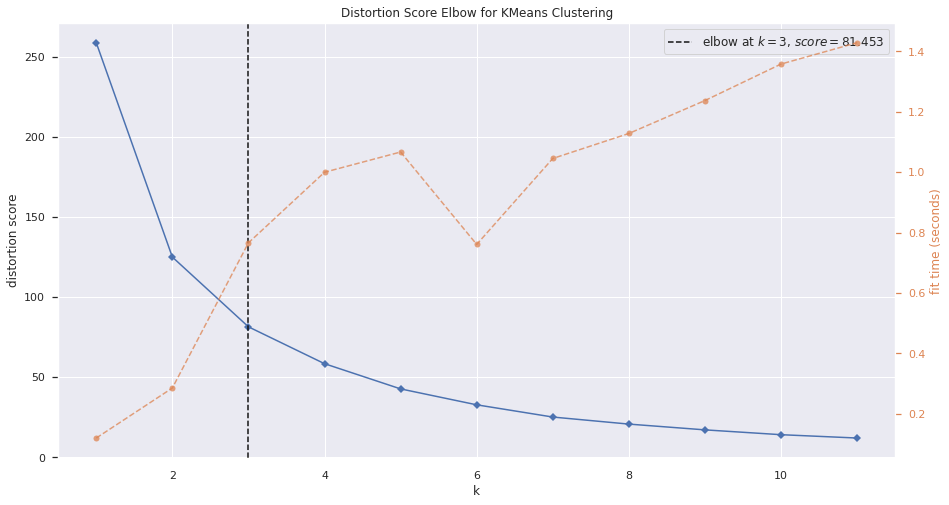

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

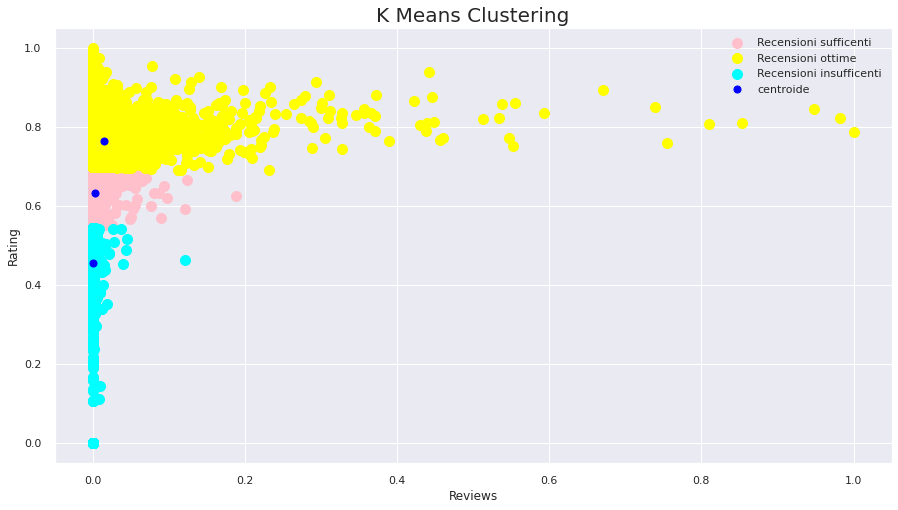

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Recensioni sufficenti')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Recensioni ottime')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Recensioni insufficenti')
#plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroide')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.legend()
plt.show()


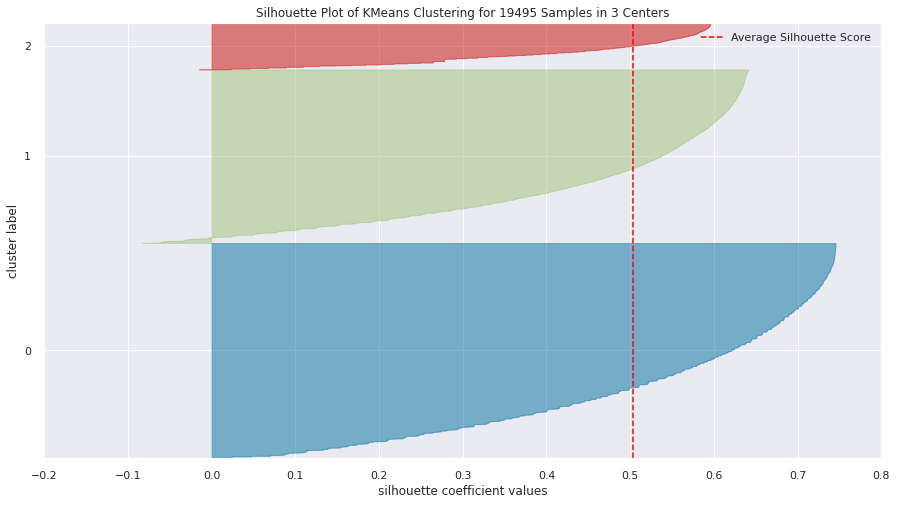

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# take only annual income and spending score
x = data.iloc[:, [10, 15]].values

# let's check the shape of x
print(x.shape)


(19495, 2)


## **Clustering PCA**

(19495, 4)


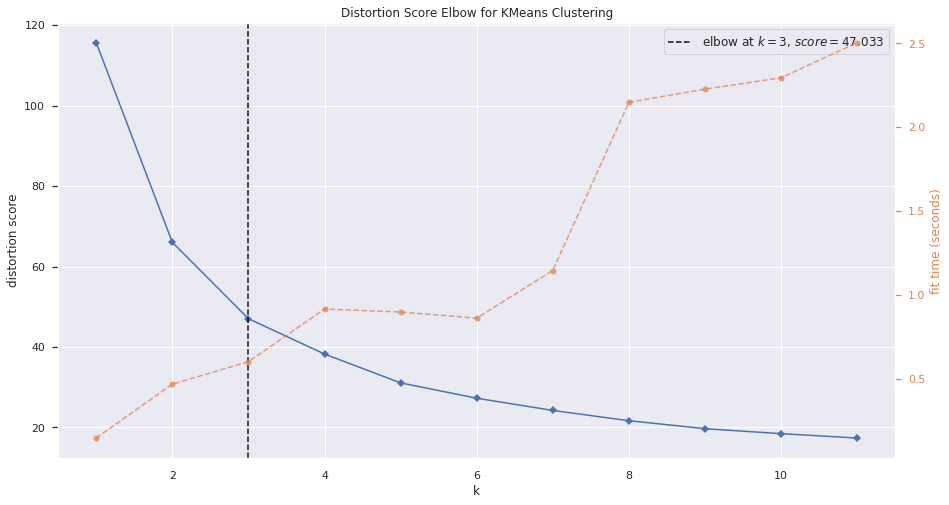

In [ ]:
x = data.drop(drop_list_2, axis=1).values
print(x.shape)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


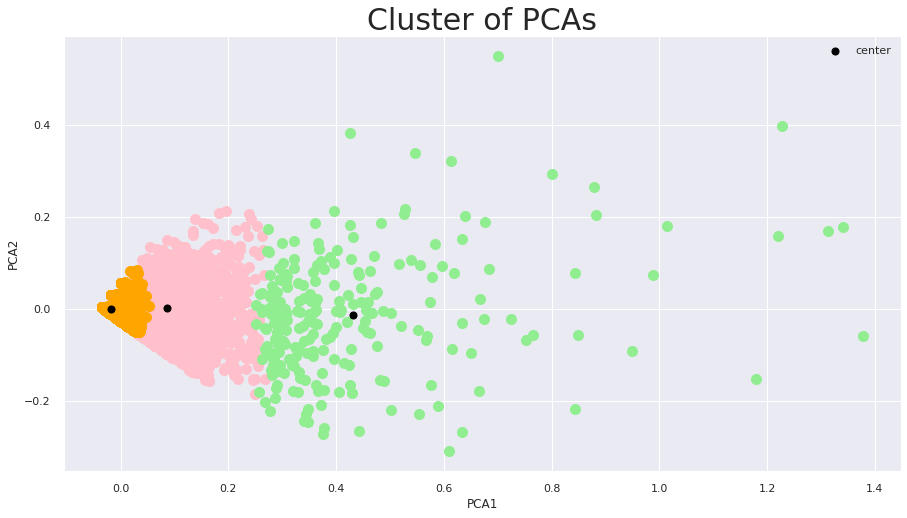

In [ ]:
pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
#plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

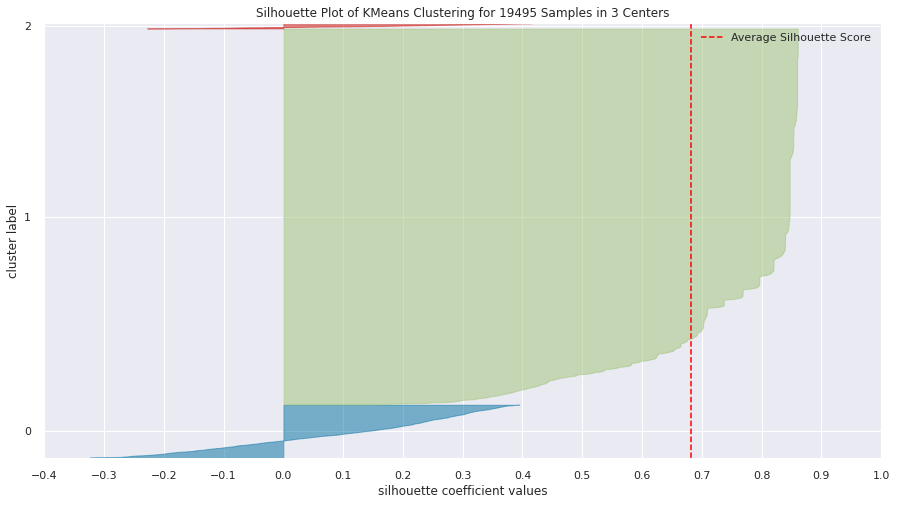

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## **Hierarchical Clustering**

In [ ]:
# take only annual income and spending score
x = data.iloc[:, [5, 6]].values

# let's check the shape of x
print(x.shape)


(19495, 2)


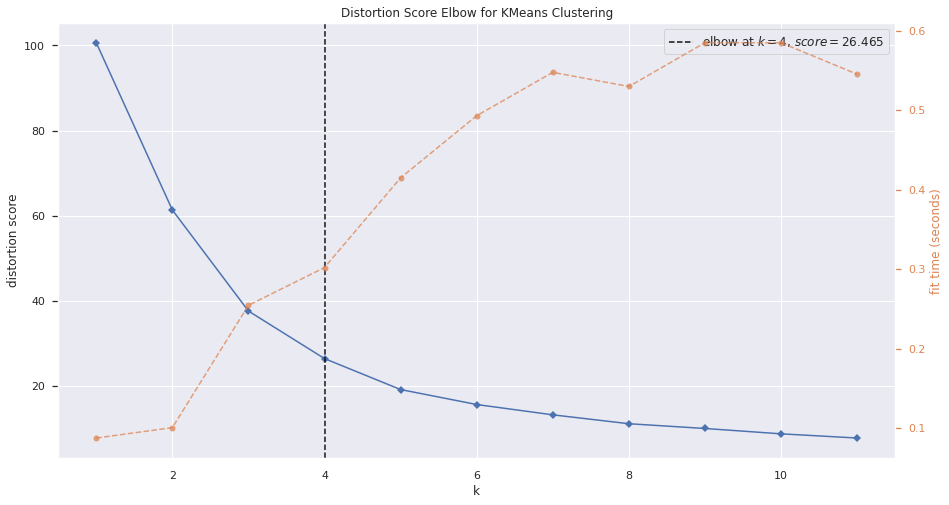

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

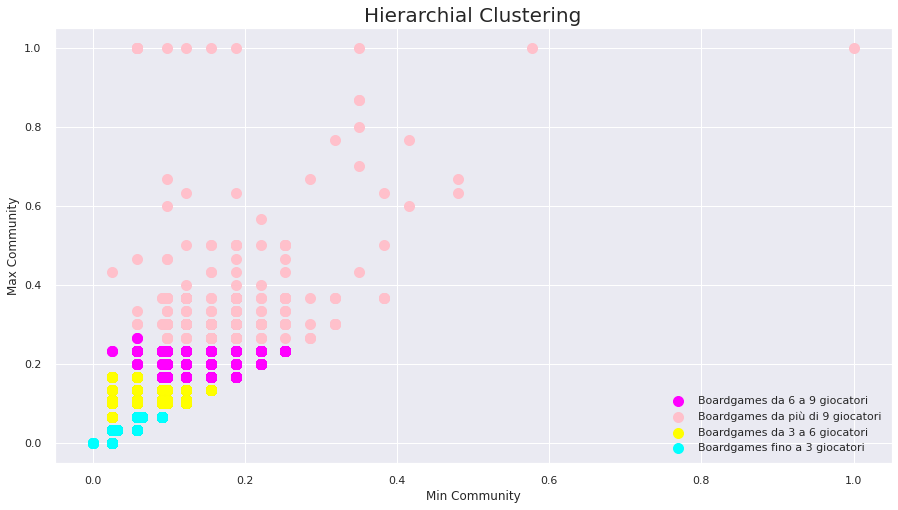

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Boardgames da 6 a 9 giocatori')
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Boardgames da più di 9 giocatori')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Boardgames da 3 a 6 giocatori')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Boardgames fino a 3 giocatori')
#plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Min Community')
plt.ylabel('Max Community')
plt.legend()
plt.show()


## **DBSCAN Clustering**




In [ ]:
# take only annual income and spending score
x = data.iloc[:, [28, 29]].values

# let's check the shape of x
print(x.shape)


(19495, 2)


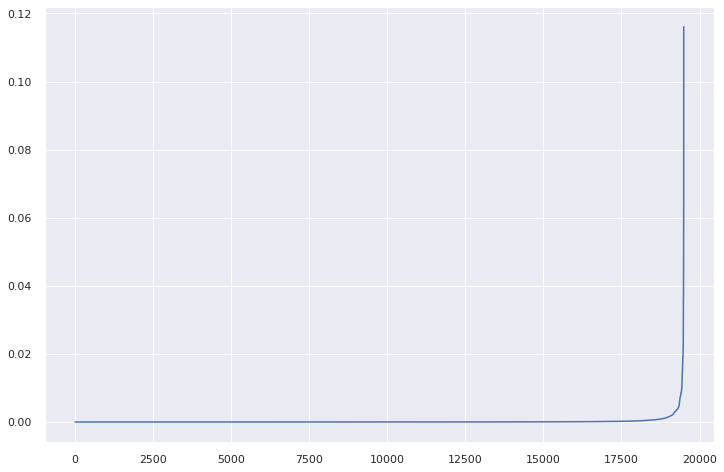

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

# **Classificazione**

## **Classificazione per categoria**

### Classi sbilanciate

In [ ]:
class_drop_list= ['boardgamedesigner_cnt', 'boardgameartist_cnt', 'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt', 'boardgamemechanic_cnt',
'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt', 'languagedependence']
data.drop(class_drop_list, axis = 1, inplace=True)

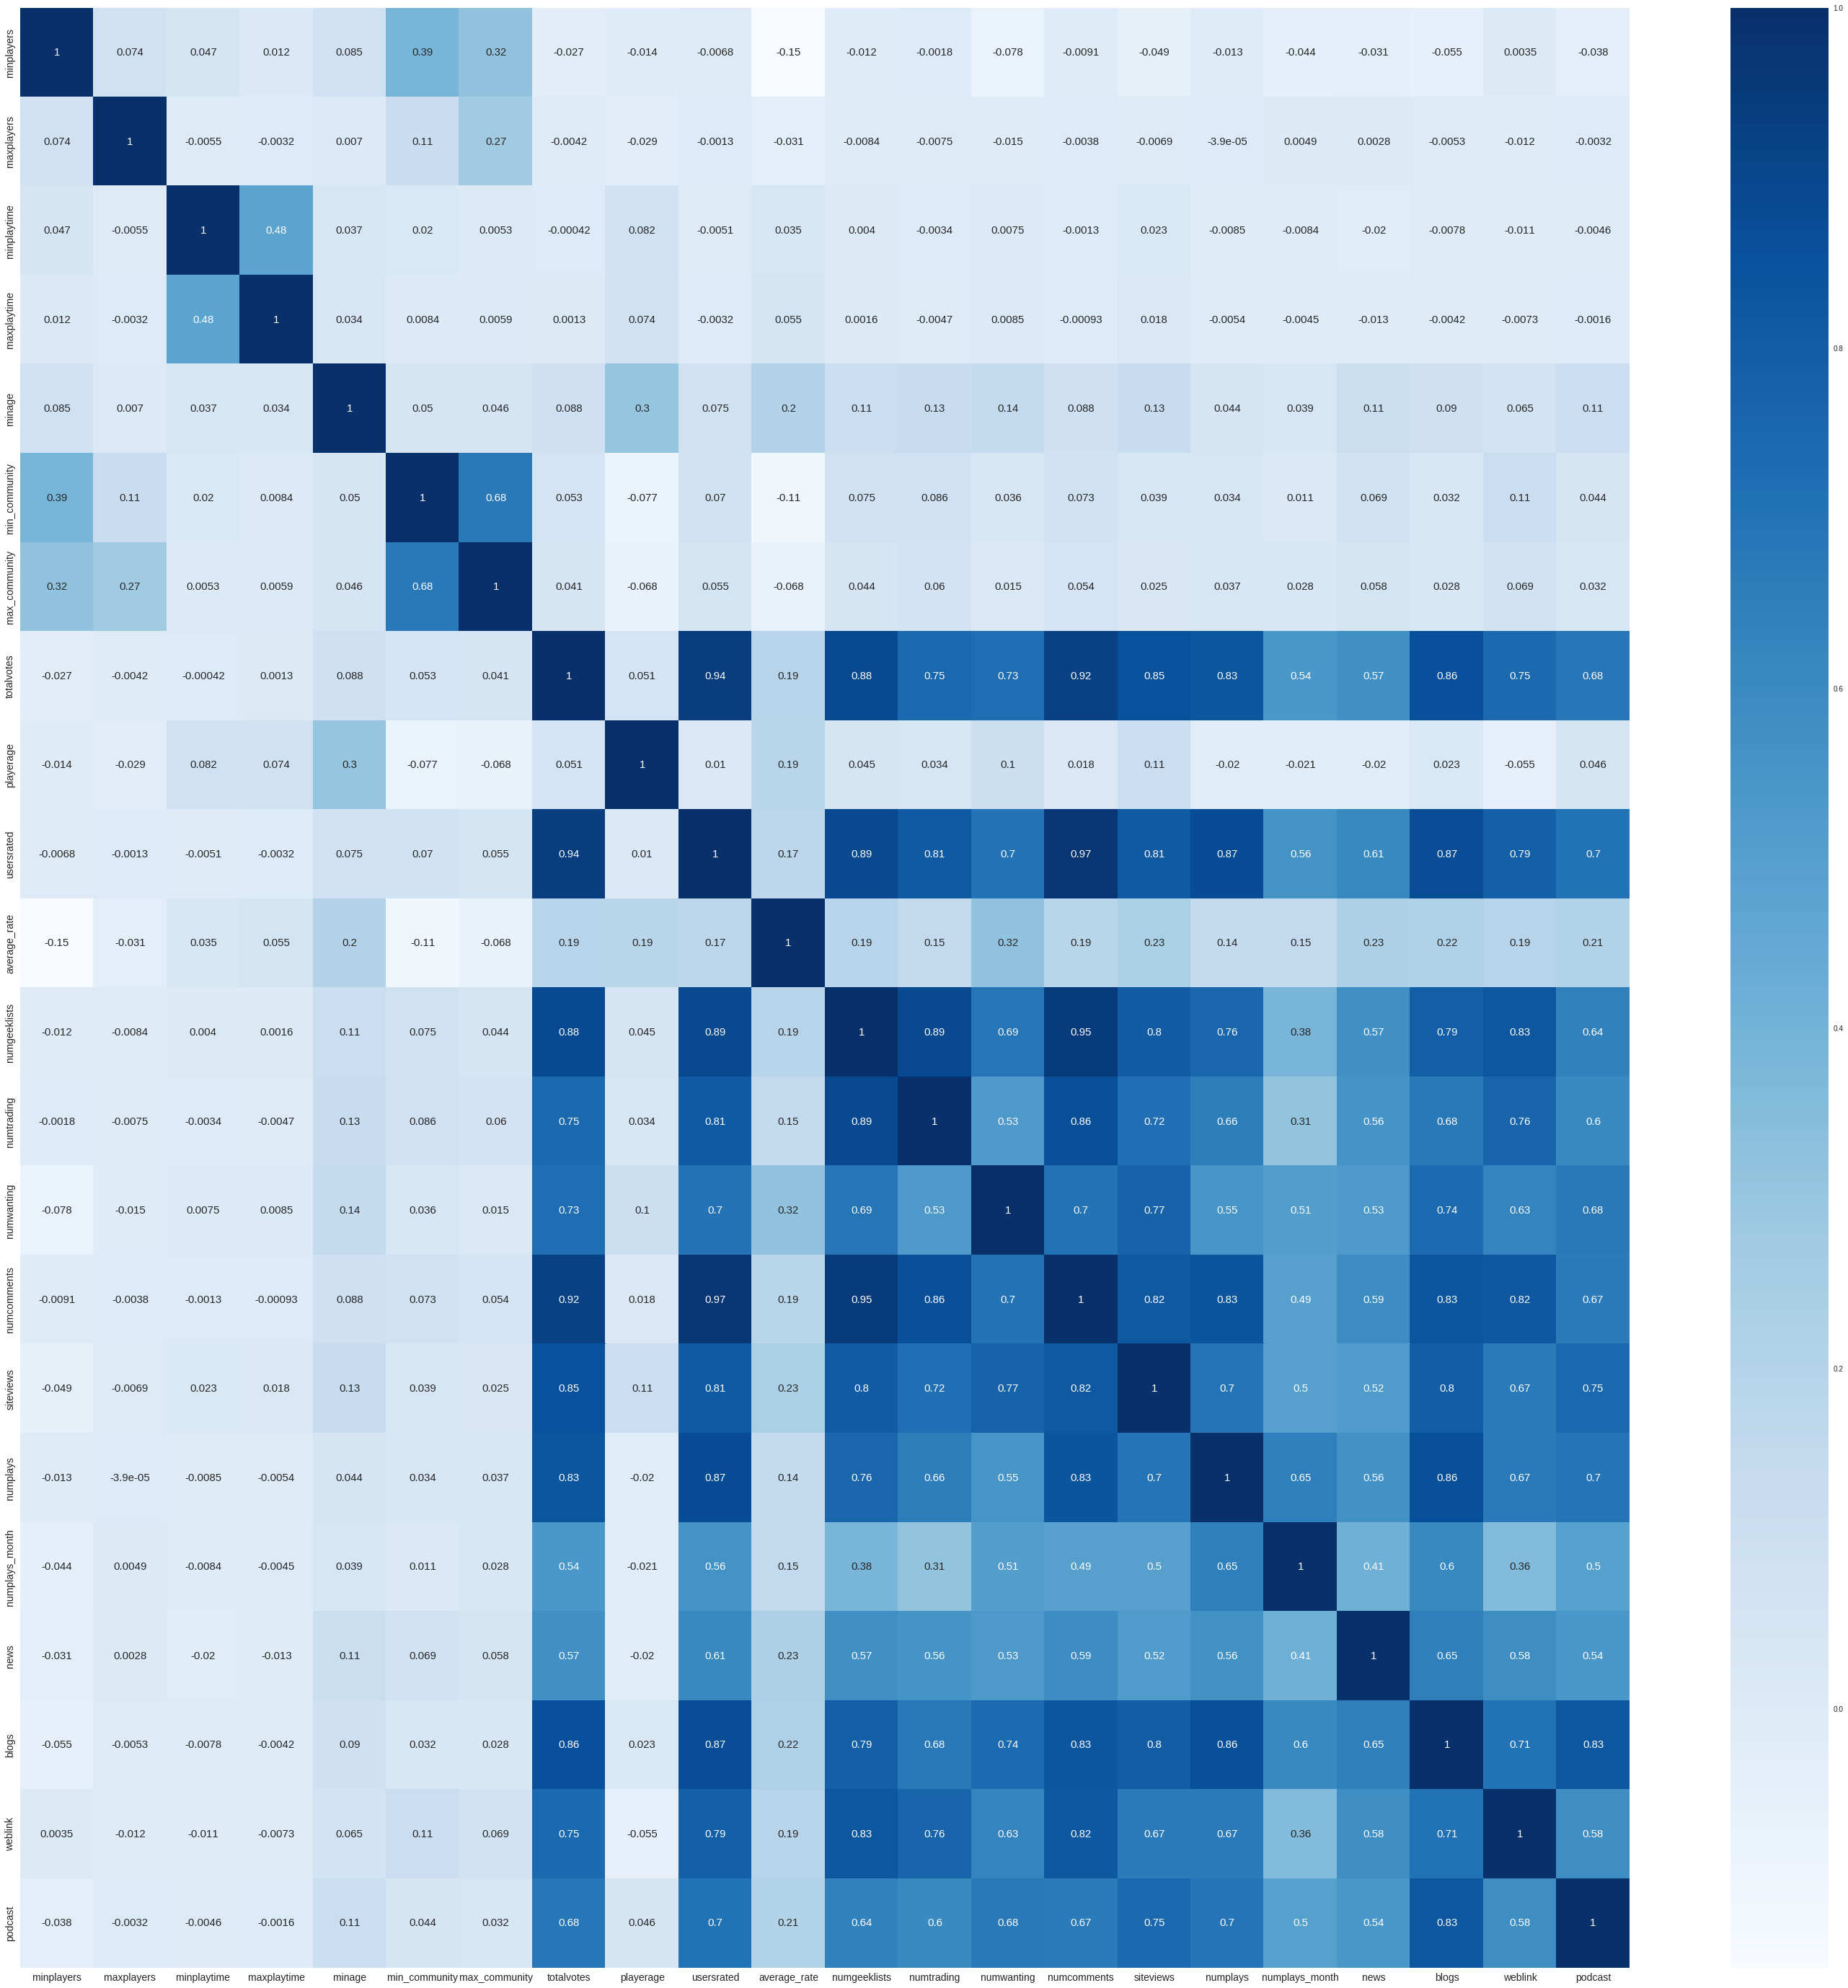

In [ ]:
plt.figure(figsize=(50,50))
heatmap = sns.heatmap(data.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 15})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
plt.show()

In [ ]:
# Data Normalization
norm_list= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
'totalvotes',
'playerage',
'usersrated',
'average_rate',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',]
names = data.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(data[norm_list])
data[norm_list] = scaled_d
data.head()

,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,usersrated,...,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast,boardgamecategory
objectid,,,,,,,,,,,,,,,,,,,,,
174430,0.1,0.004004,0.001,0.0010,0.48,0.090752,0.1,0.442719,0.750,0.344473,...,0.660058,0.348364,1.000000,0.366873,0.610818,0.233333,0.406736,0.146226,0.240901,Adventure
161936,0.2,0.004004,0.001,0.0005,0.52,0.123226,0.1,0.293897,0.625,0.382773,...,0.372824,0.319489,0.332654,0.313340,0.191430,0.300000,0.515544,0.325472,0.284229,Environmental
167791,0.1,0.005005,0.002,0.0010,0.48,0.090752,0.1,0.670236,0.625,0.532779,...,1.000000,0.424313,0.528855,0.392026,0.769231,0.466667,1.000000,0.283019,0.256499,Economic
182028,0.2,0.004004,0.002,0.0010,0.56,0.090752,0.1,0.233405,0.750,0.201356,...,0.507253,0.155165,0.274031,0.086508,0.089744,0.166667,0.159758,0.141509,0.072790,Card Game
224517,0.2,0.004004,0.001,0.0010,0.56,0.090752,0.1,0.129550,0.750,0.110989,...,0.520793,0.099283,0.100129,0.037189,0.143133,0.100000,0.107081,0.061321,0.036395,Economic


[]

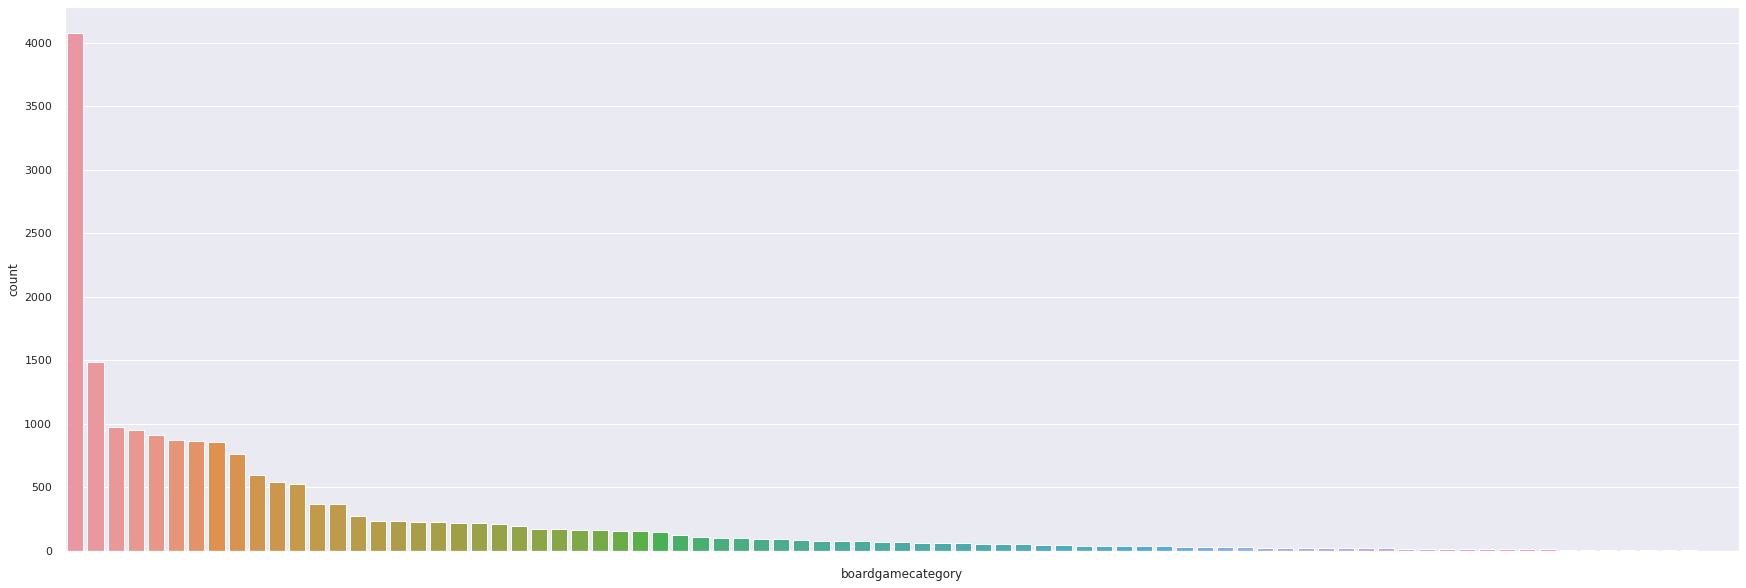

In [ ]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="boardgamecategory",data=data, order=pd.value_counts(data['boardgamecategory']).index)
ax.set_xticklabels([])

Adventure: 978

Economic: 861

Card Game: 4077

Civilization: 125

Modern Warfare: 197

Fighting: 234

American West: 166

Age of Reason: 148

Dice: 765

Ancient: 600

City Building: 273

Medieval: 216

Animals: 858

Fantasy: 523

Abstract Strategy: 1484

Bluffing: 876

Action / Dexterity: 952

Industry / Manufacturing: 35

Deduction: 372

Aviation / Flight: 233

Renaissance: 38

Post-Napoleonic: 51

Trains: 66

Science Fiction: 222

Exploration: 174

Miniatures: 173

Wargame: 912

Farming: 37

Civil War: 50

Real-time: 54

Political: 62

Electronic: 59

Racing: 157

Negotiation: 45

Collectible Components: 84

Party Game: 370

Humor: 161

Horror: 108

Movies / TV / Radio theme: 228

Nautical: 155

Napoleonic: 224

American Civil War: 208

Puzzle: 72

Arabian: 65

Childrens Game: 541

Educational: 91

Territory Building: 34

Comic Book / Strip: 100

Novel-based: 30

Sports: 104

Book: 81

Word Game: 76

Print & Play: 41

Memory: 47

Expansion for Base-game: 95

Trivia: 77



[]

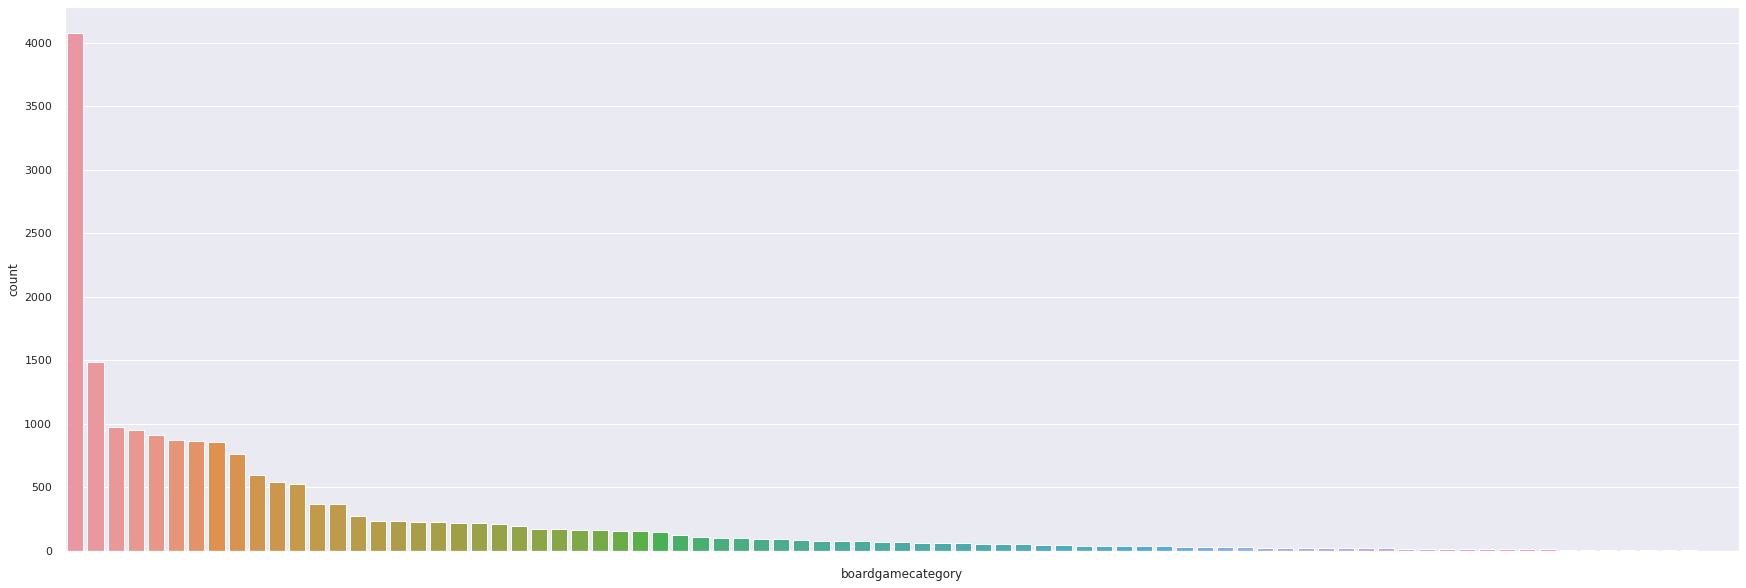

In [ ]:
labels = data['boardgamecategory'].unique()
categories = pd.Series(labels)
count = 0

for elem in labels:
  num_games_category = data[data.boardgamecategory == elem]
  if len(num_games_category) > 29:
    count += len(num_games_category)
    print(elem + ': ' + str(len(num_games_category)) + '\n')

# mean = int(count/83)

plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="boardgamecategory",data=data, order=pd.value_counts(data['boardgamecategory']).index)
ax.set_xticklabels([])

In [ ]:
for elem in labels:
  num = len(data[data.boardgamecategory == elem])
  if num < 500:
    data.drop(data.loc[data.boardgamecategory==elem].index, inplace=True)

new_labels = data['boardgamecategory'].unique()
print(new_labels)

['Adventure' 'Economic' 'Card Game' 'Dice' 'Ancient' 'Animals' 'Fantasy'
 'Abstract Strategy' 'Bluffing' 'Action / Dexterity' 'Wargame'
 'Childrens Game']


In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x= data.iloc[:,:-1]
y = data.iloc[:,-1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x)
print(y)

(10741, 22)
(2686, 22)
(10741, 1)
(2686, 1)
          minplayers  maxplayers  minplaytime  maxplaytime  minage  \
objectid                                                             
174430           0.1    0.004004     0.001000     0.001000    0.48   
167791           0.1    0.005005     0.002000     0.001000    0.48   
182028           0.2    0.004004     0.002000     0.001000    0.56   
224517           0.2    0.004004     0.001000     0.001000    0.56   
169786           0.1    0.005005     0.001500     0.000958    0.56   
...              ...         ...          ...          ...     ...   
5154             0.2    0.008008     0.001500     0.000750    0.00   
5158             0.2    0.002002     0.000333     0.000167    0.00   
5159             0.2    0.004004     0.000333     0.000167    0.20   
5160             0.2    0.002002     0.000500     0.000250    0.24   
5163             0.2    0.002002     0.000333     0.000167    0.00   

          min_community  max_community  total

In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.36 	 ---> LogisticRegression 
Accuracy: 0.32 	 ---> DecisionTreeClassifier 
Accuracy: 0.36 	 ---> SVC 
Accuracy: 0.4 	 ---> RandomForestClassifier 
Accuracy: 0.39 	 ---> AdaBoostClassifier 
Accuracy: 0.47 	 ---> GradientBoostingClassifier 


Text(0.5, 1.0, 'Cross validation scores')

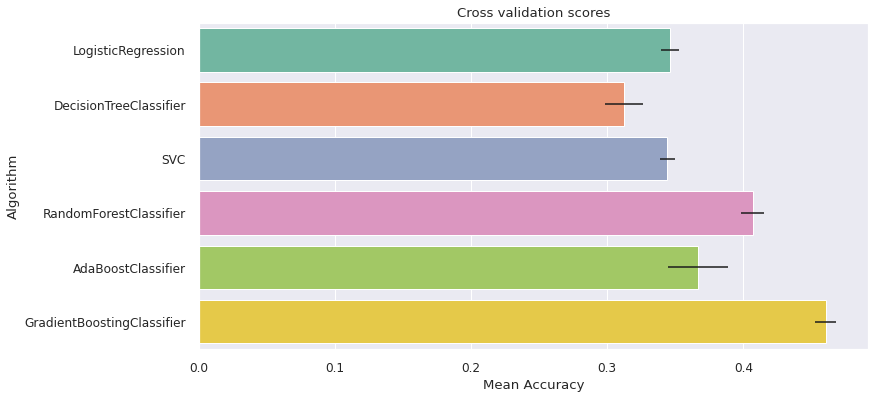

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

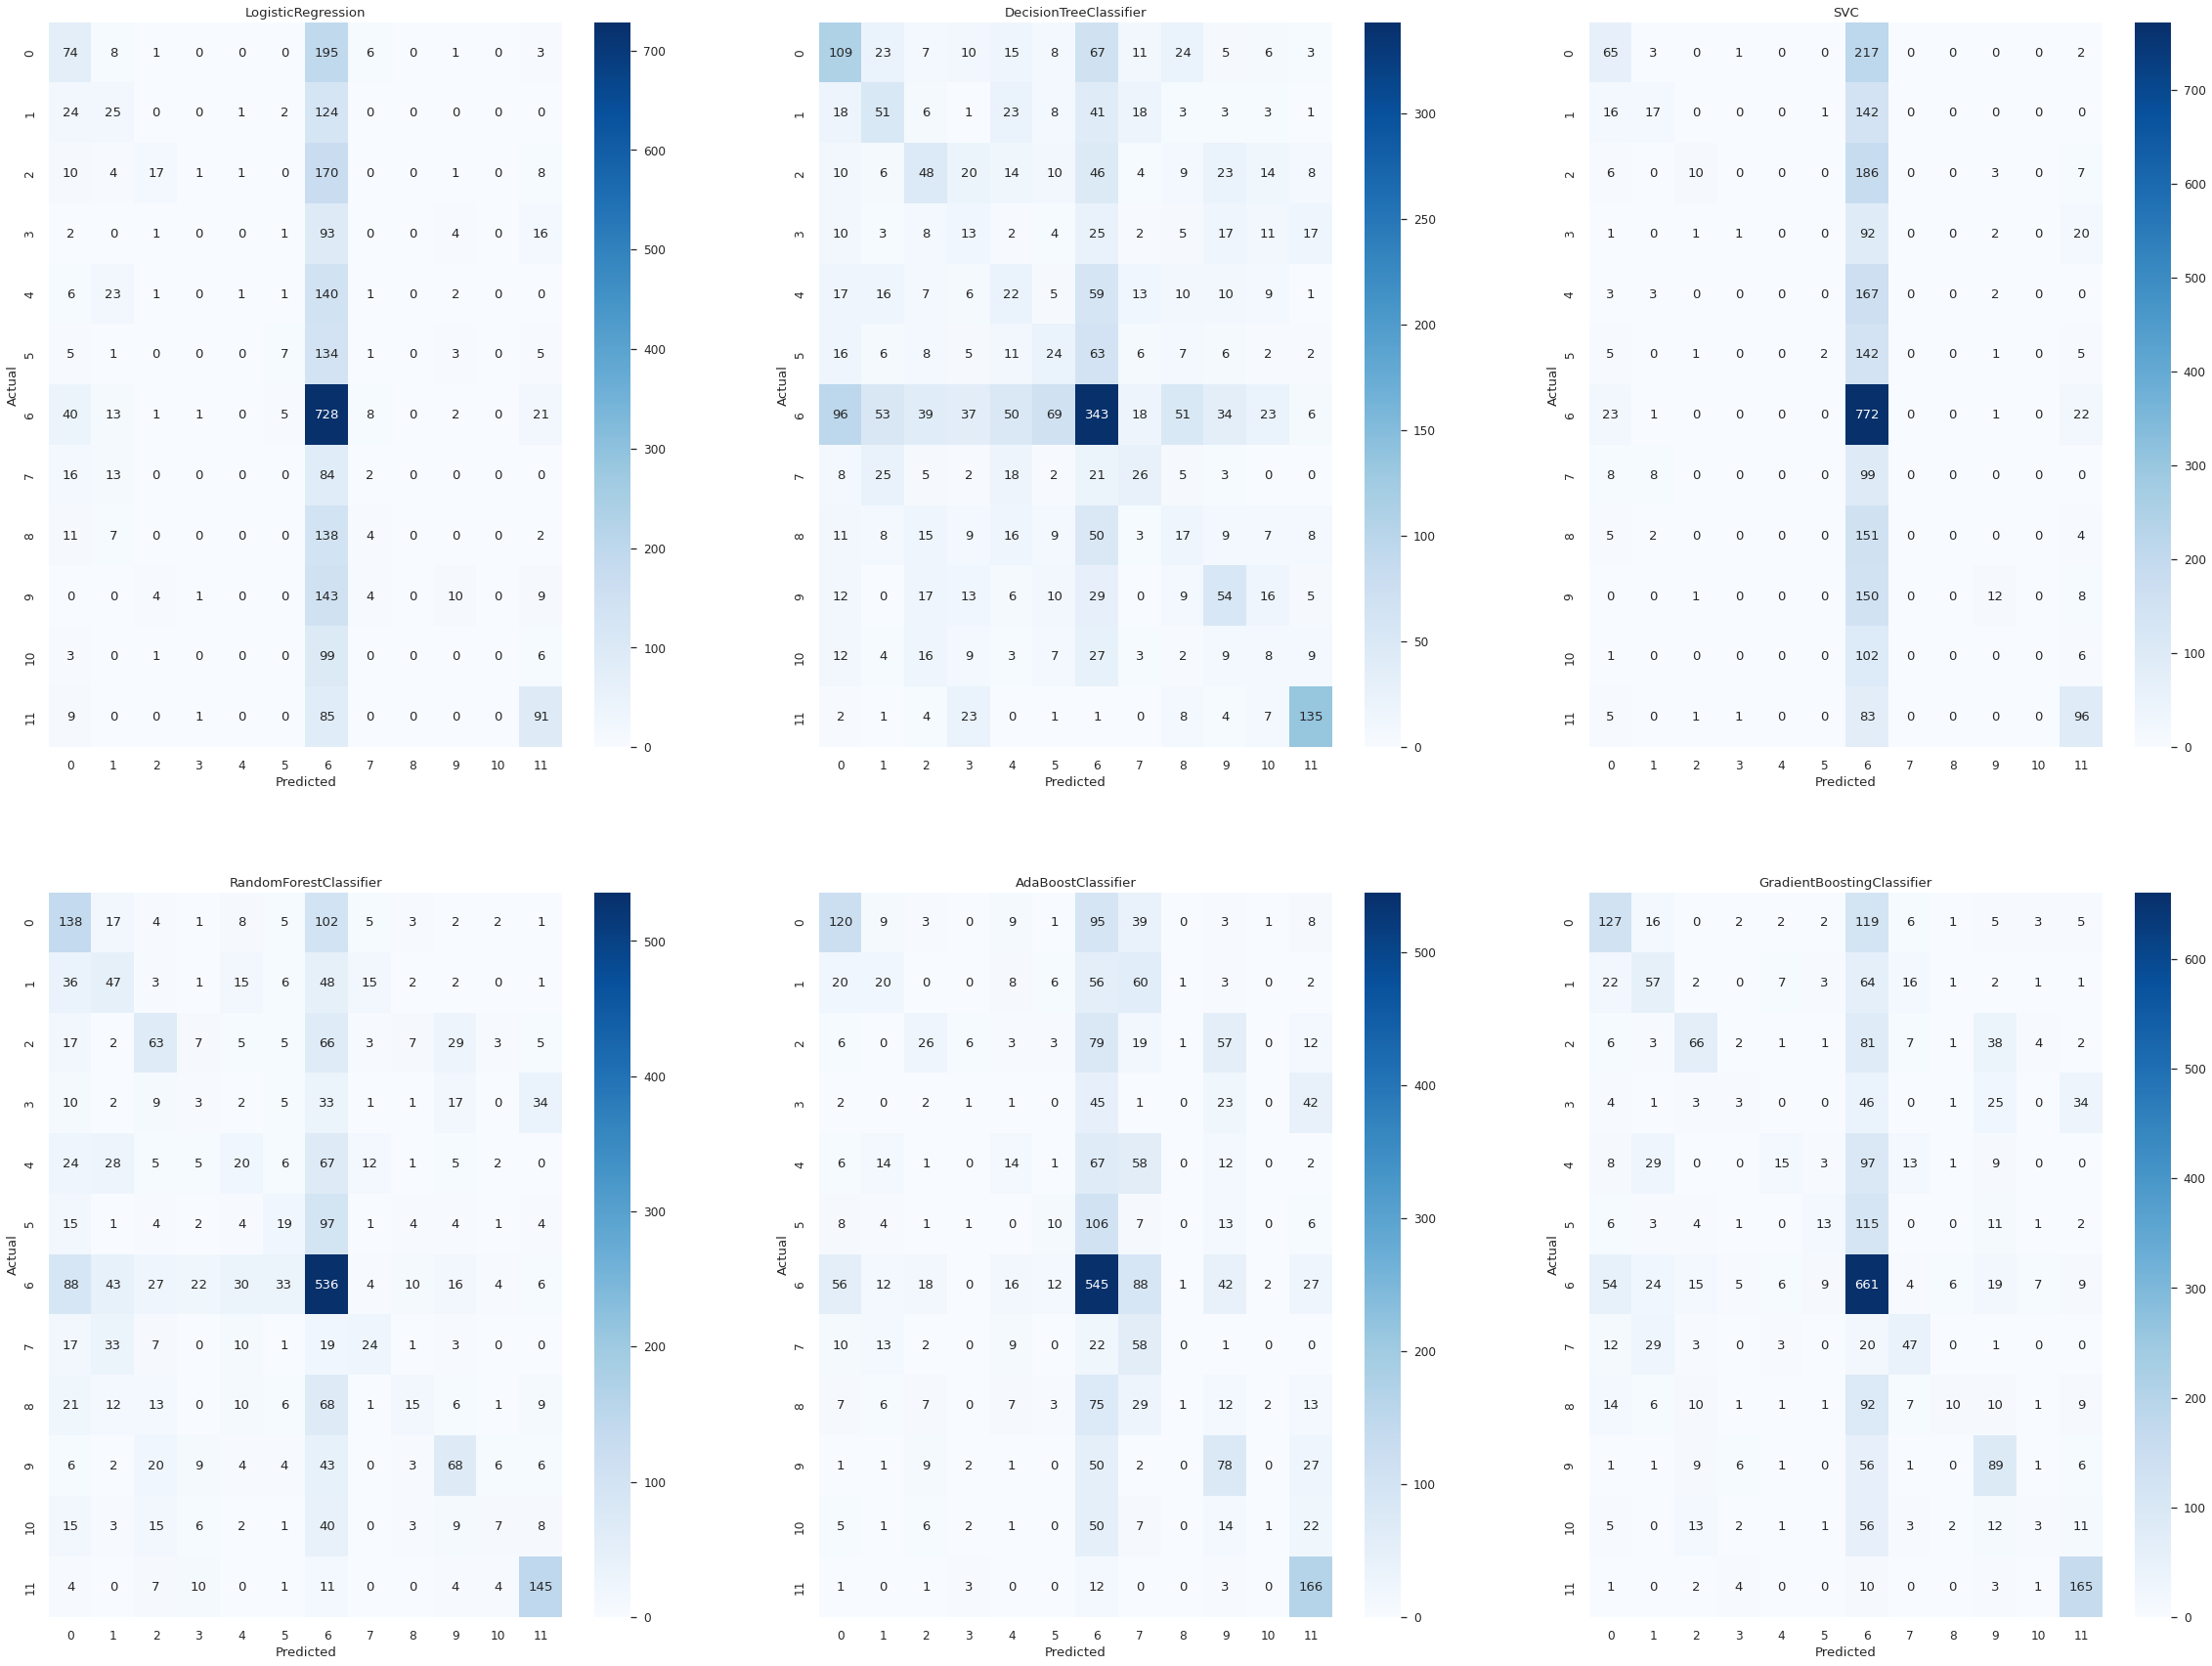

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(40,30))
sns.set(font_scale=1.1)
for i in range(len(classifiers)):
    plt.subplot(2,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
                    precision    recall  f1-score   support

 Abstract Strategy       0.37      0.26      0.30       288
Action / Dexterity       0.27      0.14      0.19       176
         Adventure       0.65      0.08      0.14       212
           Ancient       0.00      0.00      0.00       117
           Animals       0.33      0.01      0.01       175
          Bluffing       0.44      0.04      0.08       156
         Card Game       0.34      0.89      0.49       819
    Childrens Game       0.08      0.02      0.03       115
              Dice       0.00      0.00      0.00       162
          Economic       0.43      0.06      0.10       171
           Fantasy       0.00      0.00      0.00       109
           Wargame       0.57      0.49      0.52       186

          accuracy                           0.36      2686
         macro avg       0.29      0.17      0.16      2686
      weighted avg       0.33      0.36      0.26      2

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("boardgamecategory", axis=1).corr(),annot=True)
plt.title("Correlation between models")

ValueError: ignored

<Figure size 1080x576 with 0 Axes>

## **Classificazione per language dependence**

### Classi sbilanciate

In [ ]:
# importing the dataset
data = pd.read_csv(dataset, delimiter=";")
class_drop_list= ['boardgamedesigner_cnt', 'boardgameartist_cnt', 'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt', 'boardgamemechanic_cnt',
'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamecategory',"name", "yearpublished", "sortindex", "boardgamedesigner", "boardgameartist",
 'boardgamepublisher', "boardgamemechanic", 'description']
data.drop(class_drop_list, axis = 1, inplace=True)

# Dealing with null values, for numerical:
for col in data.columns:
    if data[col].dtype != object:
        data[col]=data[col].fillna(data[col].mean())

# check semantic values of data
for i in range(0,len(data)):
  while data["min_community"][i] > data["max_community"][i]:
    data["min_community"][i] = data["min_community"][i] - 1
  while data["max_community"][i] < data["min_community"][i]:
    data["max_community"][i] = data["max_community"][i] + 1


data = data.set_index("objectid")
data = data.dropna()
data.head()

,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,languagedependence,...,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast
objectid,,,,,,,,,,,,,,,,,,,,,
174430,1,4,60,120,12,3.0,4.0,827,14.0,4,...,313,1365,5972,8933078,230213,3478,7,471,31,139
161936,2,4,60,60,13,4.0,4.0,549,12.0,4,...,272,771,5477,2971746,196621,1090,9,597,69,164
167791,1,5,120,120,12,3.0,4.0,1252,12.0,3,...,277,2068,7274,4724387,245997,4380,14,1158,60,148
182028,2,4,120,120,14,3.0,4.0,436,14.0,4,...,280,1049,2660,2448074,54284,511,5,185,30,42
224517,2,4,60,120,14,3.0,4.0,242,14.0,1,...,37,1077,1702,894621,23336,815,3,124,13,21


In [ ]:
# Data Normalization
norm_list= ['minplayers',
'maxplayers',
'minplaytime',
'maxplaytime',
'minage',
'min_community',
'max_community',
'totalvotes',
'playerage',
'usersrated',
'average_rate',
'numgeeklists',
'numtrading',
'numwanting',
'numcomments',
'siteviews',
'numplays',
'numplays_month',
'news',
'blogs',
'weblink',
'podcast',]
names = data.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(data[norm_list])
data[norm_list] = scaled_d
data.head()

,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,languagedependence,...,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast
objectid,,,,,,,,,,,,,,,,,,,,,
174430,0.1,0.004004,0.001,0.0010,0.48,0.090752,0.1,0.442719,0.750,4,...,0.135439,0.660058,0.348364,1.000000,0.366873,0.610818,0.233333,0.406736,0.146226,0.240901
161936,0.2,0.004004,0.001,0.0005,0.52,0.123226,0.1,0.293897,0.625,4,...,0.117698,0.372824,0.319489,0.332654,0.313340,0.191430,0.300000,0.515544,0.325472,0.284229
167791,0.1,0.005005,0.002,0.0010,0.48,0.090752,0.1,0.670236,0.625,3,...,0.119862,1.000000,0.424313,0.528855,0.392026,0.769231,0.466667,1.000000,0.283019,0.256499
182028,0.2,0.004004,0.002,0.0010,0.56,0.090752,0.1,0.233405,0.750,4,...,0.121160,0.507253,0.155165,0.274031,0.086508,0.089744,0.166667,0.159758,0.141509,0.072790
224517,0.2,0.004004,0.001,0.0010,0.56,0.090752,0.1,0.129550,0.750,1,...,0.016010,0.520793,0.099283,0.100129,0.037189,0.143133,0.100000,0.107081,0.061321,0.036395


4: 1641

3: 2108

1: 6140

2: 2553

5: 543

0: 6763



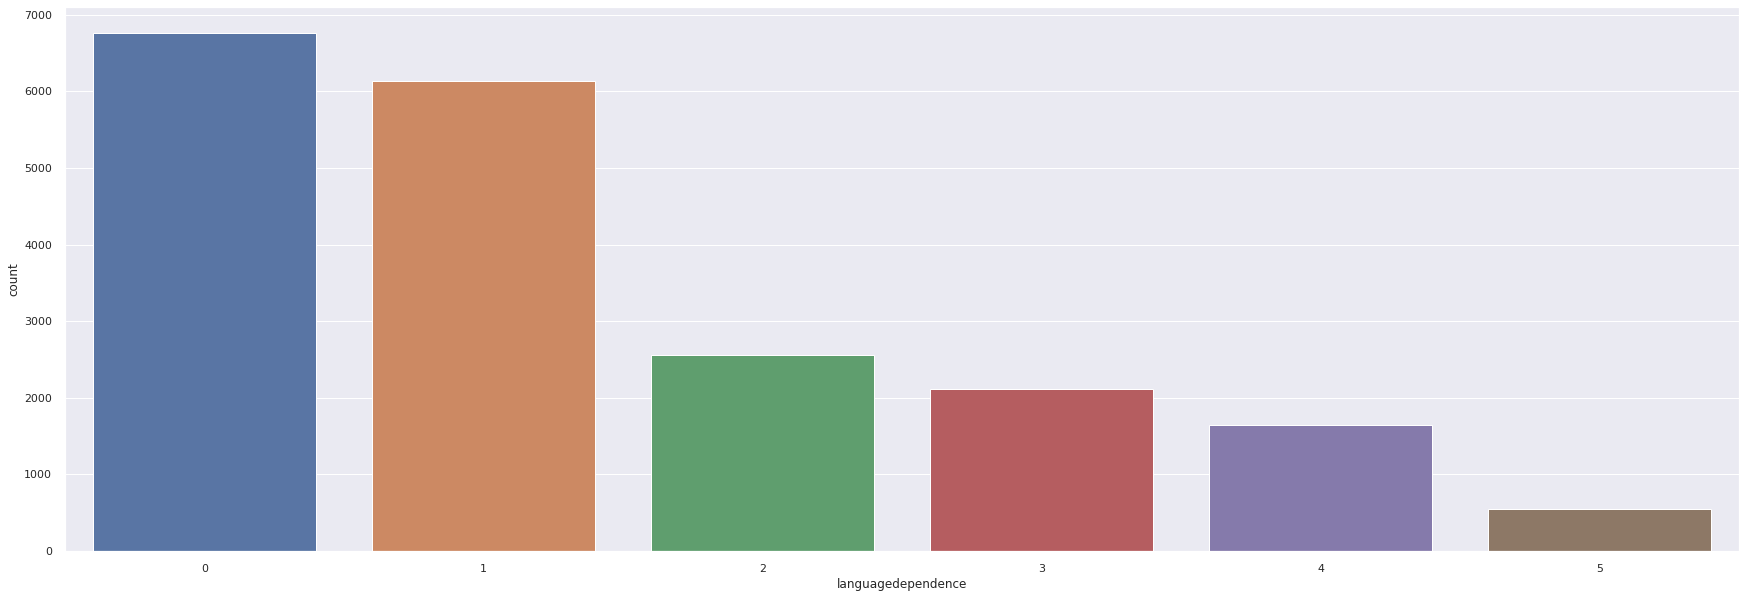

In [ ]:
labels = data['languagedependence'].unique()
classes = pd.Series(labels)
count = 0
for elem in labels:
  num_games_category = data[data.languagedependence == elem]
  count += len(num_games_category)
  print(str(elem) + ': ' + str(len(num_games_category)) + '\n')

plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="languagedependence",data=data, order=pd.value_counts(data['languagedependence']).index)

In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x= data.iloc[:,:]
#print(x)
x = x.drop('languagedependence', axis=1)
y = data.iloc[:,9:10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x)
print(y)

(15798, 22)
(3950, 22)
(15798, 1)
(3950, 1)
          minplayers  maxplayers  minplaytime  maxplaytime  minage  \
objectid                                                             
174430           0.1    0.004004     0.001000     0.001000    0.48   
161936           0.2    0.004004     0.001000     0.000500    0.52   
167791           0.1    0.005005     0.002000     0.001000    0.48   
182028           0.2    0.004004     0.002000     0.001000    0.56   
224517           0.2    0.004004     0.001000     0.001000    0.56   
...              ...         ...          ...          ...     ...   
5154             0.2    0.008008     0.001500     0.000750    0.00   
5158             0.2    0.002002     0.000333     0.000167    0.00   
5159             0.2    0.004004     0.000333     0.000167    0.20   
5160             0.2    0.002002     0.000500     0.000250    0.24   
5163             0.2    0.002002     0.000333     0.000167    0.00   

          min_community  max_community  total

In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.52 	 ---> LogisticRegression 
Accuracy: 0.44 	 ---> DecisionTreeClassifier 
Accuracy: 0.52 	 ---> SVC 
Accuracy: 0.54 	 ---> RandomForestClassifier 
Accuracy: 0.54 	 ---> AdaBoostClassifier 
Accuracy: 0.57 	 ---> GradientBoostingClassifier 


Text(0.5, 1.0, 'Cross validation scores')

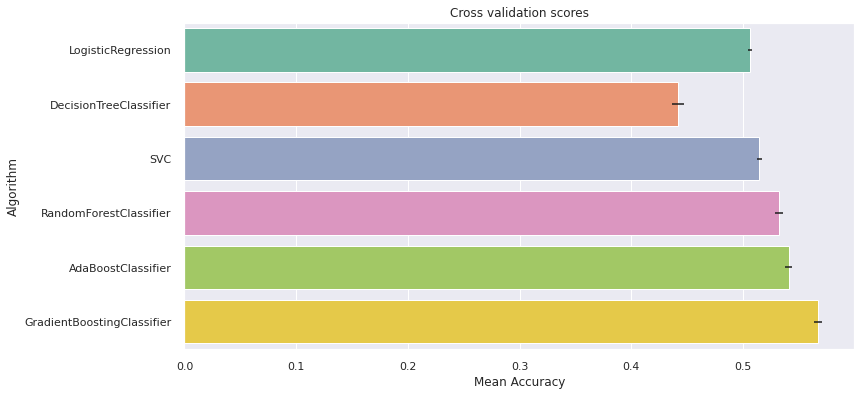

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

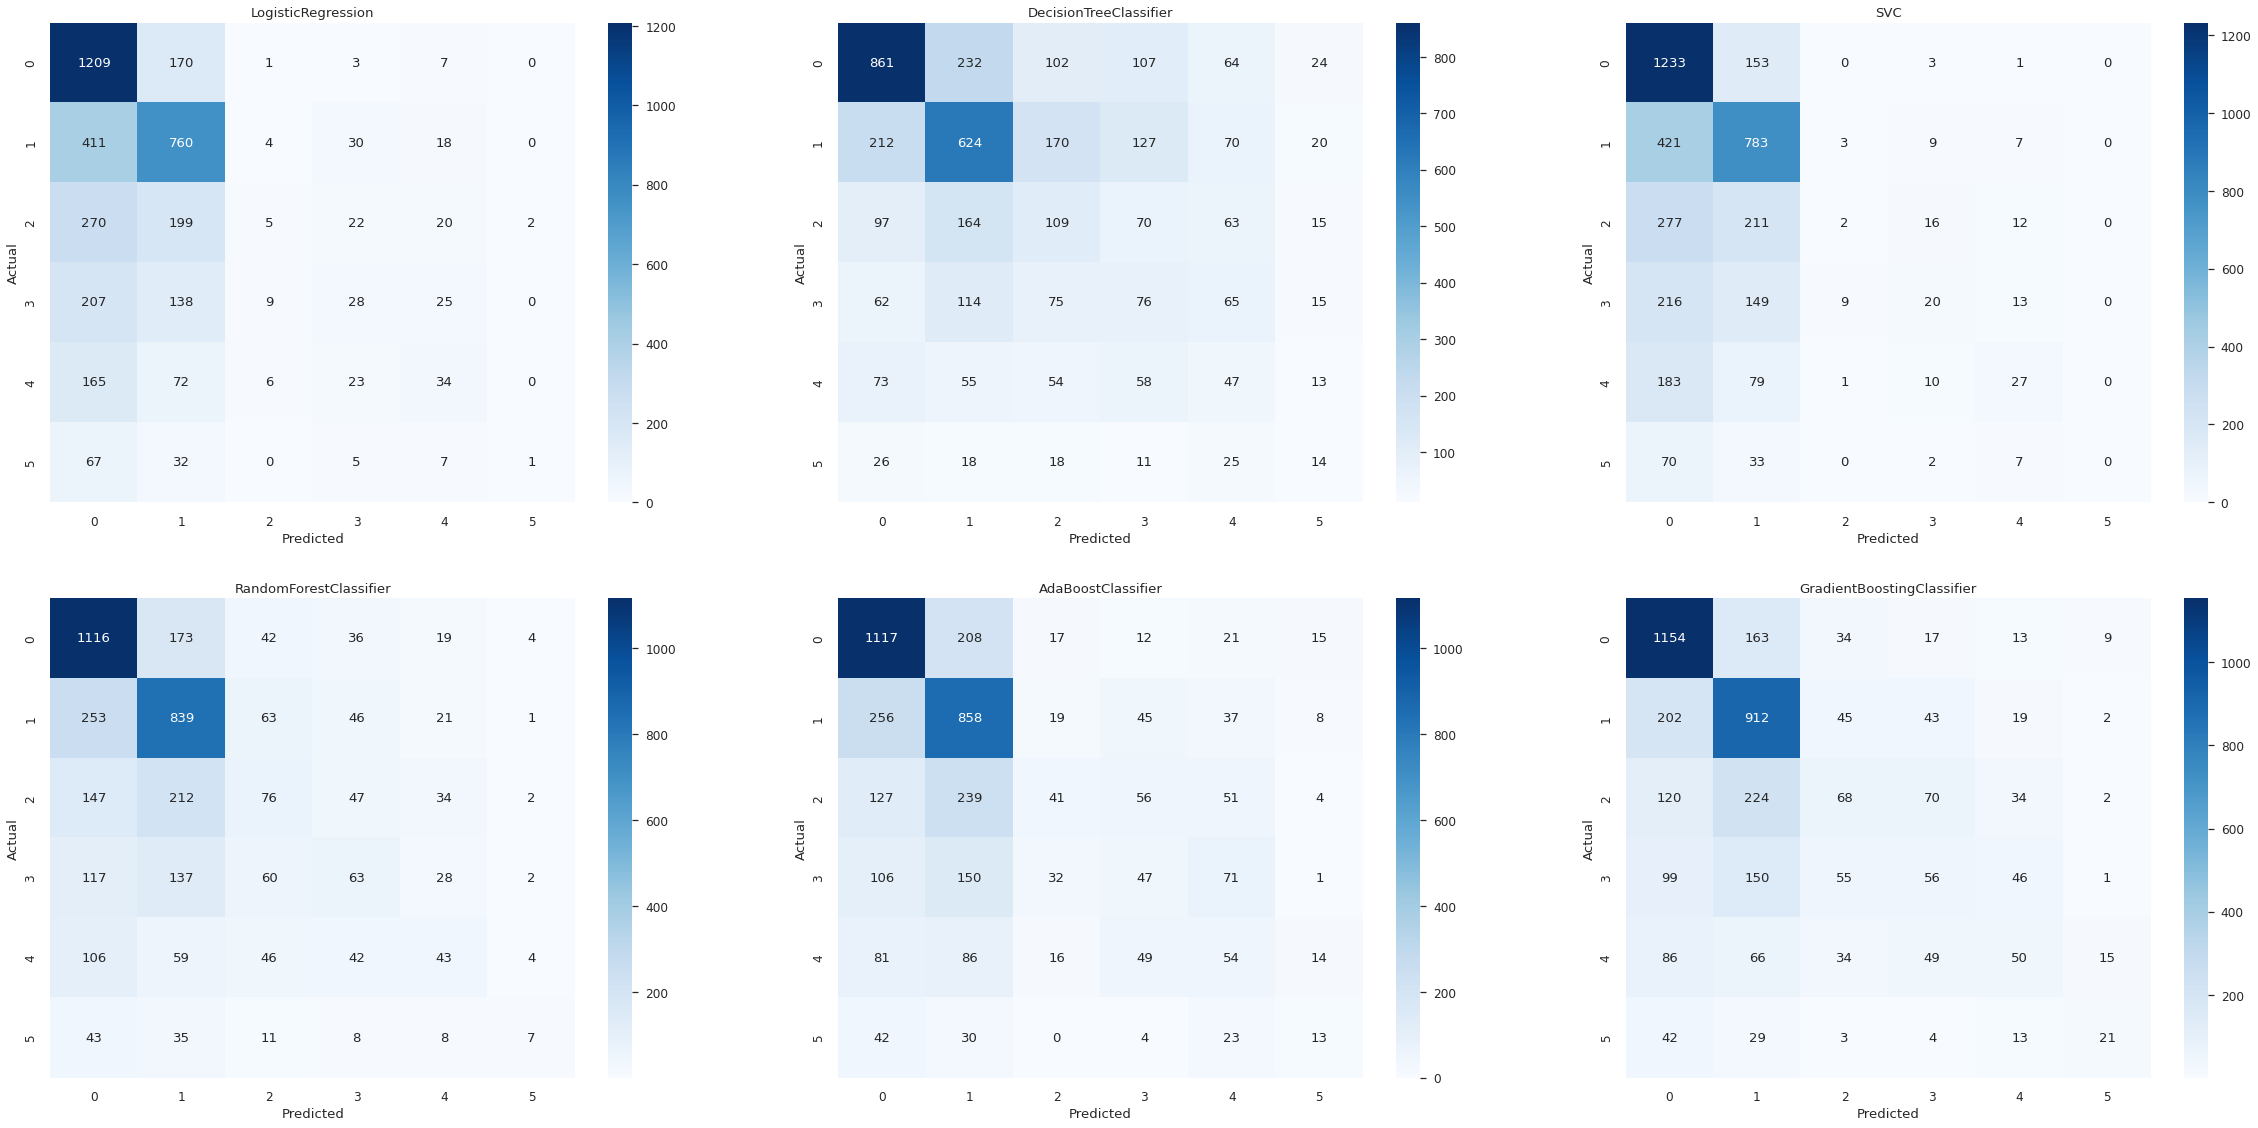

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(40,30))
sns.set(font_scale=1.1)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.87      0.65      1390
           1       0.55      0.62      0.59      1223
           2       0.20      0.01      0.02       518
           3       0.25      0.07      0.11       407
           4       0.31      0.11      0.17       300
           5       0.33      0.01      0.02       112

    accuracy                           0.52      3950
   macro avg       0.36      0.28      0.26      3950
weighted avg       0.44      0.52      0.44      3950

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63      1390
           1       0.52      0.51      0.51      1223
           2       0.21      0.21      0.21       518
           3       0.17      0.19      0.18       407
           4       0.14      0.16      0.15       300
           5       0.14      0.12      0.13 

Text(0.5, 1.0, 'Correlation between models')

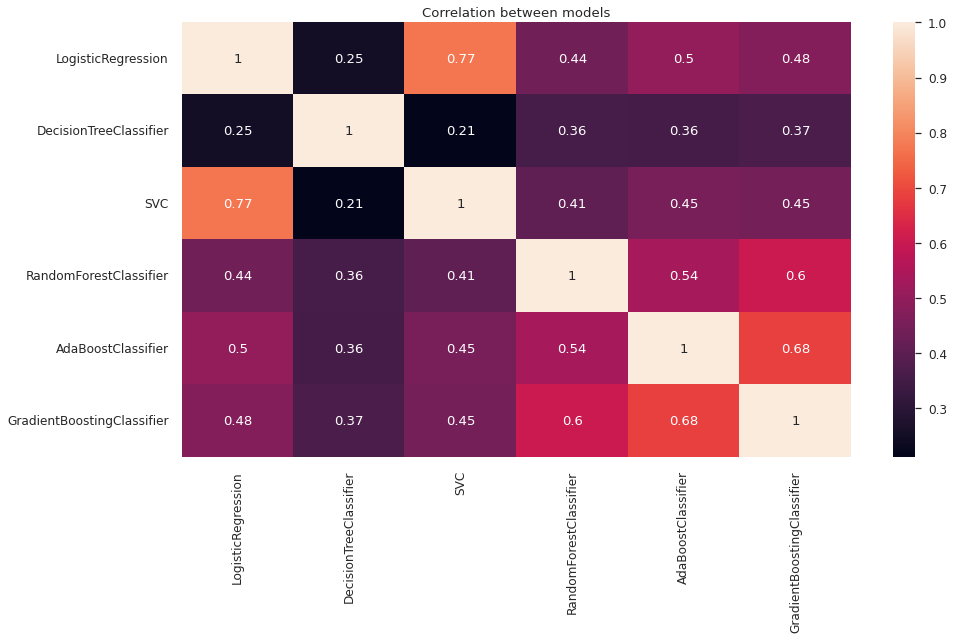

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("languagedependence", axis=1).corr(),annot=True)
plt.title("Correlation between models")

### Classi Bilanciate

In [ ]:
label_list = [1, 2, 3, 4, 5]
balanced_d =  data[data.languagedependence == 0]
minor_class = len(data[data.languagedependence==0])
for elem in label_list:
  balanced_d = pd.concat([balanced_d, data[data.languagedependence == elem].sample(minor_class, replace=True)])
print(balanced_d)

          minplayers  maxplayers  minplaytime  maxplaytime  minage  \
objectid                                                             
224821           0.1    0.002002     0.000500     0.000375    0.56   
244918           0.1    0.004004     0.000750     0.000750    0.40   
222407           0.2    0.004004     0.001500     0.001000    0.48   
180956           0.3    0.010010     0.000167     0.000083    0.32   
242684           0.2    0.004004     0.001250     0.000750    0.00   
...              ...         ...          ...          ...     ...   
194298           0.1    0.006006     0.000250     0.000750    0.32   
3086             0.1    0.004004     0.000167     0.000292    0.56   
39636            0.2    0.006006     0.000500     0.000250    0.28   
43041            0.2    0.015015     0.000333     0.000167    0.48   
3137             0.2    0.008008     0.000500     0.000250    0.40   

          min_community  max_community  totalvotes  playerage  \
objectid                

In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x= balanced_d.iloc[:,:]
x = x.drop('languagedependence', axis=1)
y = balanced_d.iloc[:,9:10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x)
print(y)

(28404, 22)
(12174, 22)
(28404, 1)
(12174, 1)
          minplayers  maxplayers  minplaytime  maxplaytime  minage  \
objectid                                                             
224821           0.1    0.002002     0.000500     0.000375    0.56   
244918           0.1    0.004004     0.000750     0.000750    0.40   
222407           0.2    0.004004     0.001500     0.001000    0.48   
180956           0.3    0.010010     0.000167     0.000083    0.32   
242684           0.2    0.004004     0.001250     0.000750    0.00   
...              ...         ...          ...          ...     ...   
194298           0.1    0.006006     0.000250     0.000750    0.32   
3086             0.1    0.004004     0.000167     0.000292    0.56   
39636            0.2    0.006006     0.000500     0.000250    0.28   
43041            0.2    0.015015     0.000333     0.000167    0.48   
3137             0.2    0.008008     0.000500     0.000250    0.40   

          min_community  max_community  tot

In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.37 	 ---> LogisticRegression 
Accuracy: 0.85 	 ---> DecisionTreeClassifier 
Accuracy: 0.39 	 ---> SVC 
Accuracy: 0.89 	 ---> RandomForestClassifier 
Accuracy: 0.4 	 ---> AdaBoostClassifier 
Accuracy: 0.54 	 ---> GradientBoostingClassifier 


Text(0.5, 1.0, 'Cross validation scores')

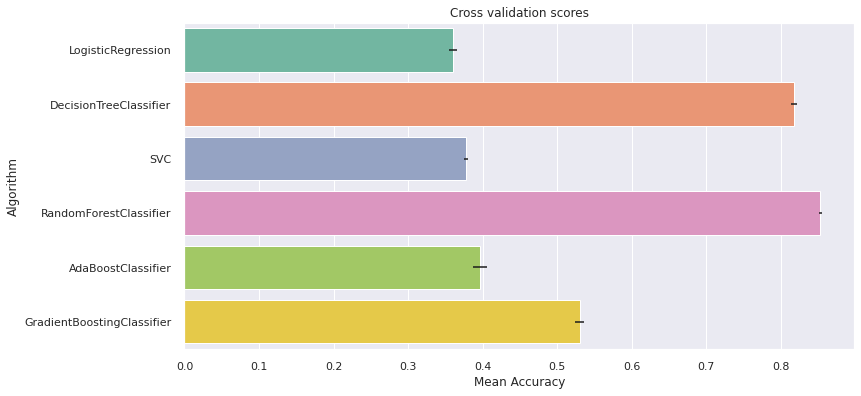

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

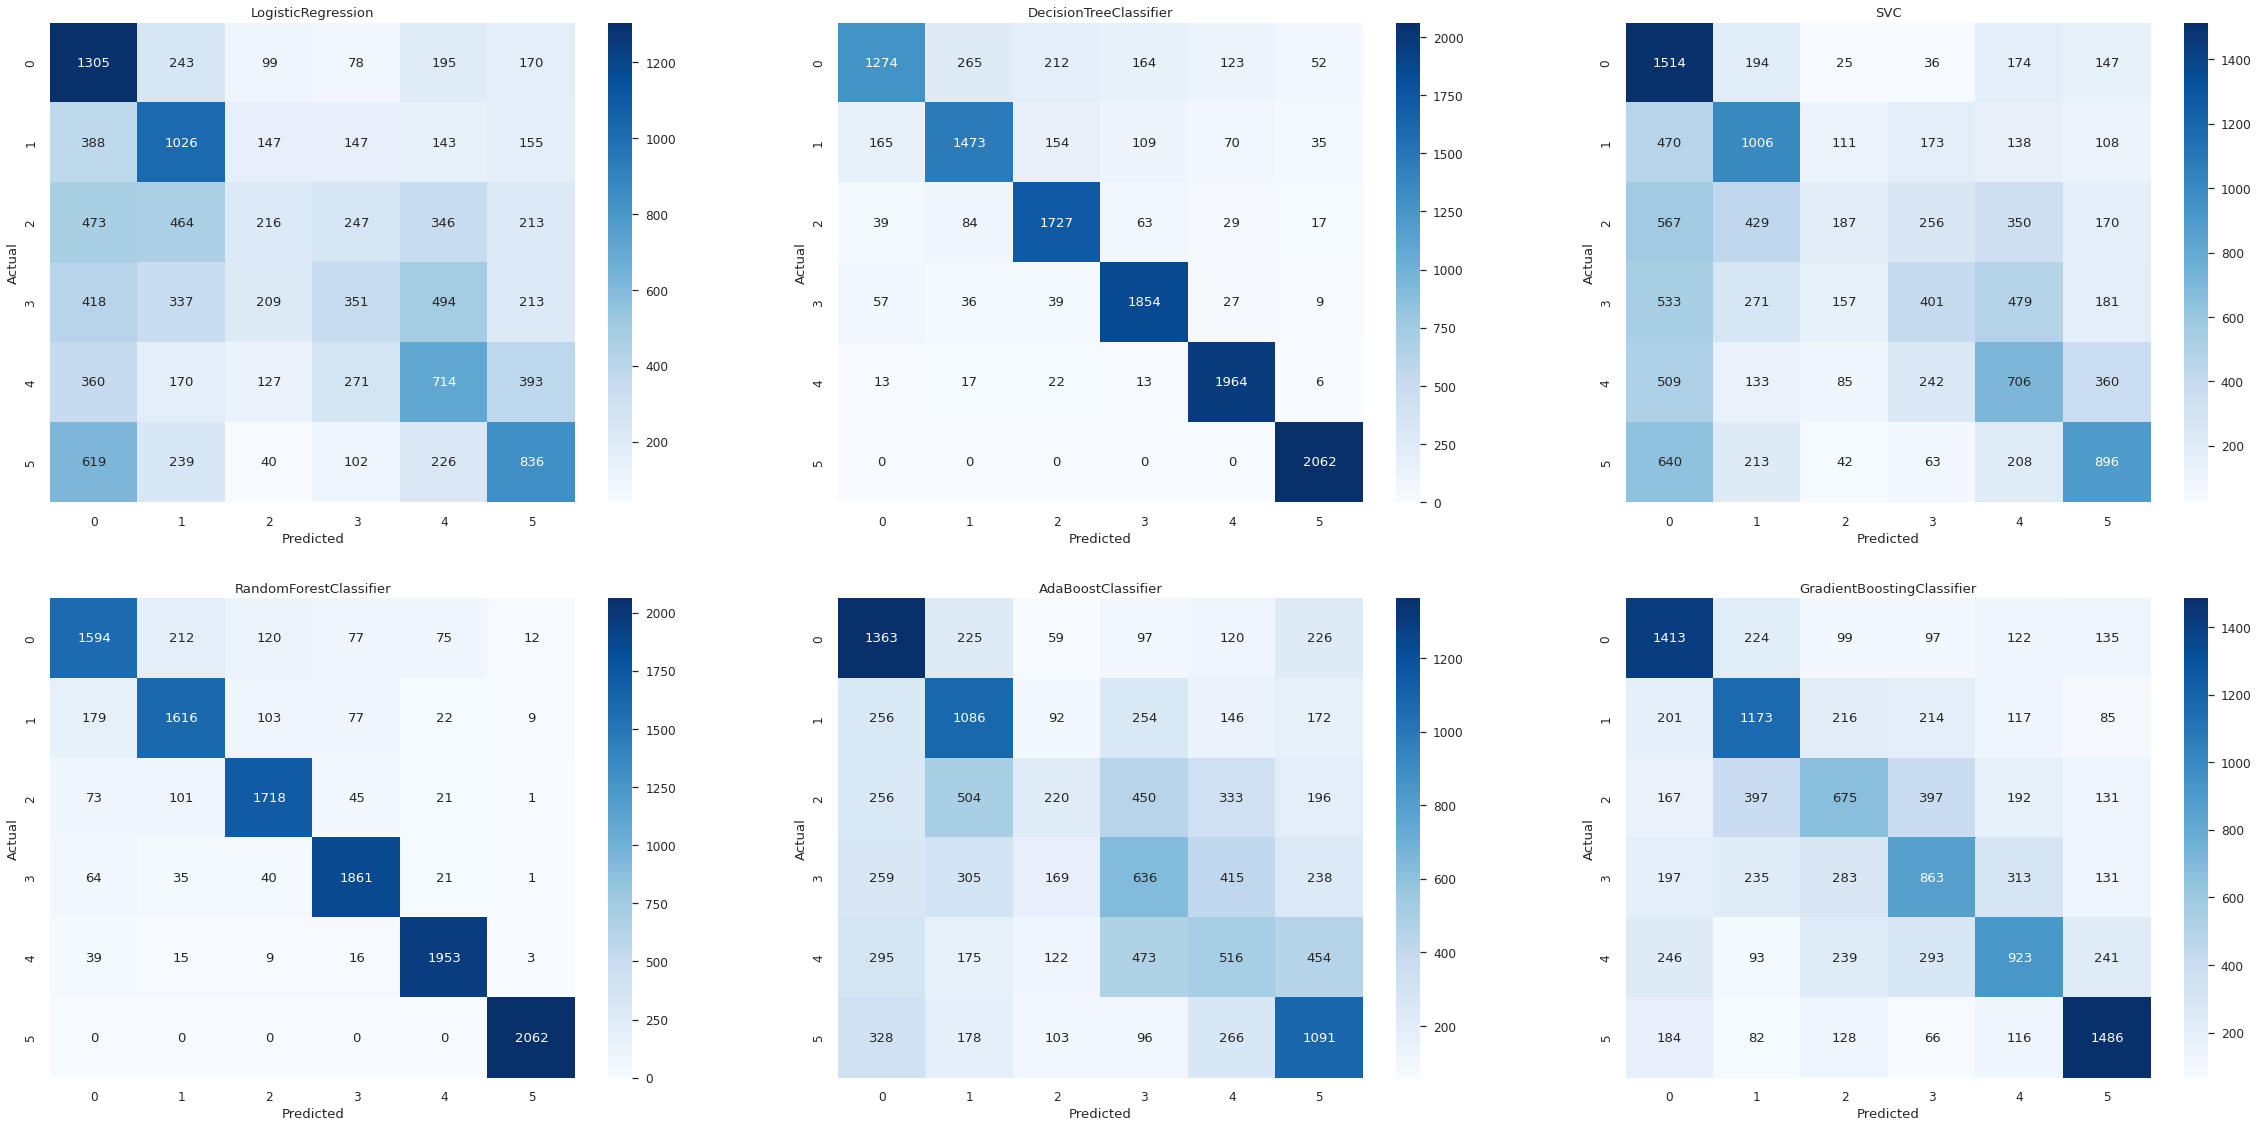

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(40,30))
sns.set(font_scale=1.1)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.62      0.46      2090
           1       0.41      0.51      0.46      2006
           2       0.26      0.11      0.15      1959
           3       0.29      0.17      0.22      2022
           4       0.34      0.35      0.34      2035
           5       0.42      0.41      0.41      2062

    accuracy                           0.37     12174
   macro avg       0.35      0.36      0.34     12174
weighted avg       0.35      0.37      0.34     12174

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      2090
           1       0.79      0.73      0.76      2006
           2       0.80      0.88      0.84      1959
           3       0.84      0.92      0.88      2022
           4       0.89      0.97      0.92      2035
           5       0.95      1.00      0.97 

Text(0.5, 1.0, 'Correlation between models')

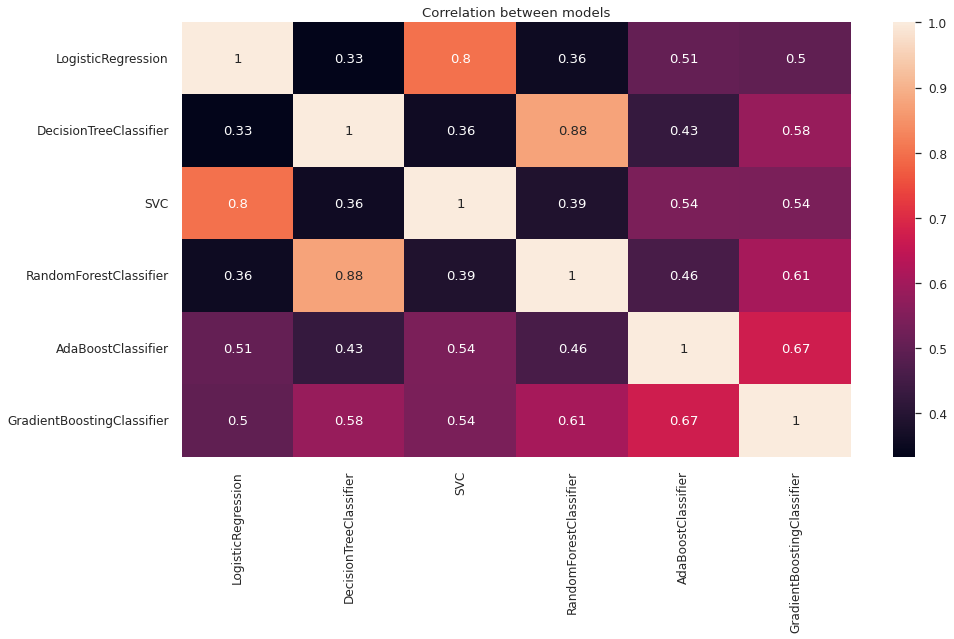

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("languagedependence", axis=1).corr(),annot=True)
plt.title("Correlation between models")